# <center> Exploring the potential relationship between Covid-19 Cases and other Variables </center>

### <center>Ankhee Paul </center>

### <center> 22/04/2021</center>

## Introduction

 December 2019 saw the advent of Covid-19, a disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2), which led to an ongoing global pandemic, as declared in March 2020. The virus has infected over 100 million people and has caused more than 2 million deaths. The pandemic caused by the virus has led to nation-wide lockdowns, travel restrictions, economic disruptions and a rush to find a cure in the form of a vaccine. Even as newly produced vaccines are being tested in several countries as of 2021, and countries are slowly staring to open up, there are several new strains of the virus emerging, especially in the U.K and Africa, that are sending nations back into lockdowns. 

 The disease, itself, can show no to severe symptoms and can even be fatal. Health experts have encouraged the wearing of face-masks, social-distancing and maintaining hygiene as some of the preventive measures. The virus is especially fatal for people with underlying diseases as well as for elderly people. 

 This project aims to understand the relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest that might have potential correlation. The independent variables chosen initially are population of the country and the number of covid-19 tests conducted in each country for every 1 million people of the population. The dependent or response variable in this study is the total number of covid-19 cases in every country. In addition to the previous variables, a third independent variable, the health risk scores of countries, was added. In order to further explore the correlation of the total number of covid-19 cases with other variable, we add the most recent average annual temperatures of countries as well as the percentage of population using basic sanitation in 2017, as potential independent variables. This is to explore whether climate and hygiene and sanitation levels affect the occurrence of the virus in countries in any way.

 The data has been obtained from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) which is supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL). It has been collected from several global entities such as the World Health Organization, Government health authorities in different countries, and data sources that have been tracking the logistics of the covid-19 disease and the global pandemic. The merged version of the datasets that has been used in this particular study, has been obtained from Kaggle.

 The datasets from which the health risk scores and the basic sanitation levels have been obtained are from the World Health Organization’s “National and Global Health Risks”- assigns risk scores out of 100 to countries based on comprehensive assessment of leading risks to global health- and “ Basic and Safely Managed Sanitation Services”  datasets, respectively. In this project, the most recent score in the year 2019 and the most recent year recorded for sanitation, 2017, are used and merged with the covid-19 world dataset in order to make the necessary comparisons. The health risk scores used have been collected using a self-assessment tool for annual reporting called the State Party Self-Assessment Annual Reporting Tool or SPAR. The SPAR (State Party Self-Assessment Annual Reporting) tool consists of 24 indicators for the 13 International Health Regulation capacities needed to detect, assess, notify, report and respond to public health risk and acute events of domestic and international concern.

 The average annual temperatures have been obtained by HTML based web scraping of a Wikipedia page containing multiple tables. These tables displayed monthly and annual dynamic climate information pertaining to the most recent year.

 Project 1 introduces the initial variables and provides summary statistics and information about them, laying the groundwork to explore our research question. Project 2 focuses on visualization of our variables through graphs and maps. Project 3 acquires additional variables such through webscraping and merging datasets and provided information on them through visualizations and maps. The final project explores regression models and uses machine learning methods to answer the research question.

# <center> PROJECT 1 <centre>

## 1.1. Introduction
 December 2019 saw the advent of Covid-19, a disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2), which led to an ongoing global pandemic, as declared in March 2020. The virus has infected over 100 million people and has caused more than 2 million deaths. The pandemic caused by the virus has led to nation-wide lockdowns, travel restrictions, economic disruptions and a rush to find a cure in the form of a vaccine. Even as newly produced vaccines are being tested in several countries as of 2021, and countries are slowly staring to open up, there are several new strains of the virus emerging, especially in the U.K and Africa, that are sending nations back into lockdowns. 

 The disease, itself, can show no to severe symptoms and can even be fatal. Health experts have encouraged the wearing of face-masks, social-distancing and maintaining hygiene as some of the preventive measures. The virus is especially fatal for people with underlying diseases as well as for elderly people. 

 This project aims to understand the relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest that might have potential correlation. The independent variables chosen initially are population of the country and the number of covid-19 tests conducted in each country for every 1 million people of the population. The dependent or response variable in this study is the total number of covid-19 cases in every country.In addition to the previous variables, we add a third independent variable, the health risk scores of countries.

 The data has been obtained from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) which is supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL). It has been collected from several global entities such as the World Health Organization, Government health authorities in different countries, and data sources that have been tracking the logistics of the covid-19 disease and the global pandemic. The merged version of the datasets that has been used in this particular study, has been obtained from Kaggle.

The dataset from which the health risk scores have been obtained is from the World Health Organization’s “National and Global Health Risks” which assigns risk scores out of 100 to countries based on comprehensive assessment of leading risks to global healthThe health risk scores used have been collected using a self-assessment tool for annual reporting called the State Party Self-Assessment Annual Reporting Tool or SPAR. The SPAR (State Party Self-Assessment Annual Reporting) tool consists of 24 indicators for the 13 International Health Regulation capacities needed to detect, assess, notify, report and respond to public health risk and acute events of domestic and international concern.

In the Data section we obtain the data from different datasets and create a complete dataframe. The Summary Statistics section introduces the variables of interest and provides summary statistics on them followed by the Summary section which shows a preliminary representation of the relationship between the dependent and some of the independent variables.


In [207]:
#basic setup
#installing required packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.colors as mplc
import matplotlib.patches as patches
import statsmodels.formula.api as sm #for linear regression: sm.ols
from sklearn.linear_model import LinearRegression
from pandas_datareader import DataReader
from IPython.display import Image
import plotly.express as px
import geopandas as gpd

%matplotlib inline

In [208]:
#hides warning messages
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## 1.2. Data

### Original Data

In [209]:
#reading covid-19 worldometer data 
covid_data_raw = (pd.read_csv("/Users/ankheepaul/Desktop/ECO225/Project 1/datasets-merged/worldometer_data.csv")
                  .set_index("Country/Region")
                 )

#changing data to a dataframe
covid_df_unmer = pd.DataFrame(covid_data_raw)

#renaming dataframe column
covid_df_unmer = covid_df_unmer.rename(columns = {'WHO Region':'who_reg'}, inplace = False)

#Displaying the dataframe

covid_df_unmer


,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,who_reg
Country/Region,,,,,,,,,,,,,,,
USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


In [210]:
#Displaying Data information
covid_df_unmer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, USA to Western Sahara
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Continent         208 non-null    object 
 1   Population        208 non-null    float64
 2   TotalCases        209 non-null    int64  
 3   NewCases          4 non-null      float64
 4   TotalDeaths       188 non-null    float64
 5   NewDeaths         3 non-null      float64
 6   TotalRecovered    205 non-null    float64
 7   NewRecovered      3 non-null      float64
 8   ActiveCases       205 non-null    float64
 9   Serious,Critical  122 non-null    float64
 10  Tot Cases/1M pop  208 non-null    float64
 11  Deaths/1M pop     187 non-null    float64
 12  TotalTests        191 non-null    float64
 13  Tests/1M pop      191 non-null    float64
 14  who_reg           184 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 26.1+ KB


The dataframe consists of 16 columns including the index. Most of the columns simply display discrete values enumerating the number of covid-19 cases in each country, country's population, total number of deaths and recoveries caused by covid-19, new as well as active cases in each country, and the number of covid-19 tests conducted. Other than the columns displaying countries, World Health Organization's regional divisions and continents- which are categorical values- most of the other columns carry decimal or "float" values. There are a number of missing values. However, we do not remove them as the entire column would be deleted resulting in the loss of a particular country's covid-19 related information.


### Risk Scores

To determine the causes of the number of covid-19 cases in a country, an additional predictor variable (x), national and global health risk scores for 2019, has been added from a different dataset. The scores are out of 100 and have been given by the World Health Organization. The data provides health risk scores over a number of years but for the purpose of this study, we consider the most recent year, which is 2019. The dataset is merged with the original worldometer covid-19 dataframe in Project 1, obtained from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).

In [211]:
#read dataset
world_risk_raw = pd.read_csv("/Users/ankheepaul/Desktop/ECO225/Project 1/National and global health risk.csv")

#replace missing values
world_risk = world_risk_raw.replace('', np.nan).fillna(0)
world_risk = world_risk_raw.replace('No data', np.nan).fillna(0)

#subset most recent required columns to create a new dataframe
world_risk_clean = world_risk[["Country", "2019"]]

#rename columns
world_risk_clean = world_risk_clean.rename(columns = {'2019':'Risk_Scores_19', "Country" : "Country/Region"},
                                           inplace = False)

In [212]:
#merging with covid dataframe
covid_df = covid_df_unmer

covid_df = pd.merge(covid_df_unmer, world_risk_clean, on = "Country/Region", how='left')

#converting risk scores into a numerical value
covid_df["Risk_Scores_19"] = covid_df.Risk_Scores_19.astype(float)


## 1.3. Summary statistics

In our initial model, we have chosen four variables to work with. The independent variables (X) are population of the countries, the number of covid-19 tests that have been conducted every 1 million people of the population and the global health risk scores in 2019. The dependent variable (Y) is the total number of covid-19 cases in each country. The summary statistics for all four variables are displayed separately, and is conducted by grouping the countries together by the World Health Organization’s regional categorization for each country.
After removing a number of significant outliers in each variable using the inter-quartile range method, observations between 25% and 75% of the numerical data has been subsetted into a new dataframe and used to plot boxplots in order to better visualize the distribution of the data.

In [134]:
#function to remove outliers
def Remove_Outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    truelist = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return truelist

#List of the values within the inter-quantile range
non_Outlier = Remove_Outlier(covid_df)

# Non-Outlier Subset of the Given Dataset
dfsub = covid_df[non_Outlier]


In [135]:
#Summary statistics for TotalCases

covid_df_unmer[["TotalCases", "who_reg"]].groupby("who_reg").describe()

TotalCases                                                \
                          count           mean            std    min      25%   
who_reg                                                                         
Africa                     47.0   18128.212766   78196.749195   10.0   977.00   
Americas                   35.0  298652.914286  962476.556652   17.0   374.00   
EasternMediterranean       22.0   72993.909091   99185.790166  999.0  4991.75   
Europe                     55.0   64437.927273  137129.306101   12.0  2351.50   
South-EastAsia             10.0  242689.900000  631597.611994   25.0   977.50   
WesternPacific             15.0   17807.600000   32713.892667   20.0   268.00   

                                                    
                          50%       75%        max  
who_reg                                             
Africa                 2450.0   7725.50   538184.0  
Americas               7544.0  88480.00  5032179.0  
EasternMediterranean  33270.0  91432.75   320117.0  
Europe                14306.0  57438.50   871894.0  
South-EastAsia         4005.0  94502.25  2025409.0  
WesternPacific         1569.0  17204.50   119460.0

Total cases:

Table - The total number of covid-19 cases in each country is a discrete, dependent variable. From the summary statistics table of "TotalCases", it is observed that the average total number of cases is highest in America followed by South-East Asia. The Western Pacific region has the smallest average with only 15 countries to account for. Consequently, the standard deviation is highest in America followed by South-East Asia. The highest median, however, lies in the Eastern Mediterranean region which accounts for 22 countries.

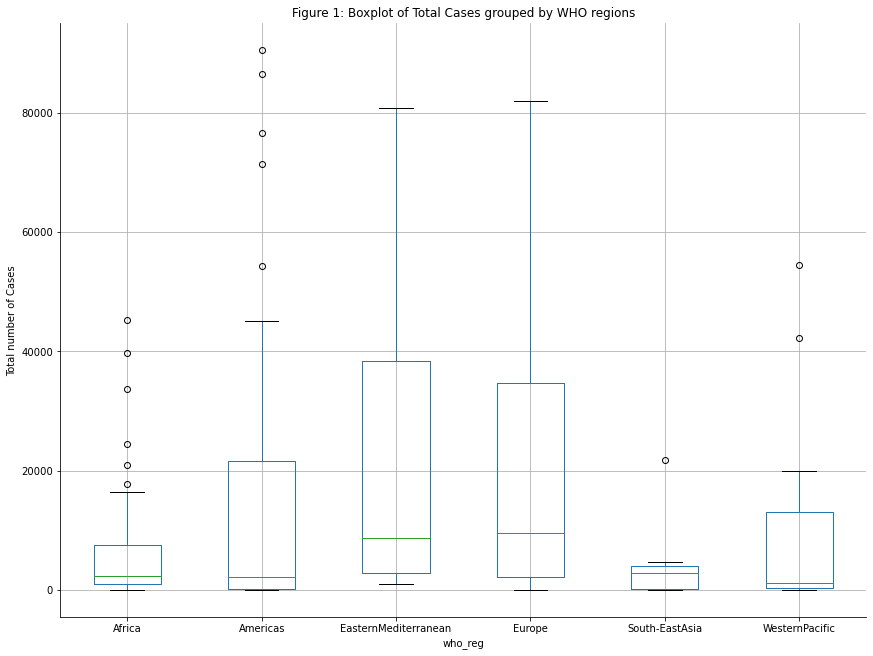

In [136]:
#plotting total cases grouped by WHO Region

bp1 = dfsub.boxplot(column = "TotalCases", by = "who_reg", figsize= (14,11))
plt.ylabel("Total number of Cases") #labelling y-axis
plt.title("Figure 1: Boxplot of Total Cases grouped by WHO regions") #adding a title
bp1.get_figure().suptitle('') #removing the pre-generated title


#removing right and top axis lines
bp1.spines['right'].set_visible(False)
bp1.spines['top'].set_visible(False)


Graph- From Figure 1, a boxplot plotting the total number of cases categorized by WHO region, the medians lie towards the lower ends of the distributions, except for South-East Asia, where the median lies in the upper end of the distribution. There are some significant outliers to be observed, especially in America, Africa and the Western Pacific, at around 80,000 cases in America, and 40,000 cases in Africa. South-East Asia has the smallest inter-quartile range while the Eastern Mediterranean region has the largest in total cases. The maximum value for the total number of cases is highest in Europe followed by Eastern Mediterranean region. The smallest maximum value is in South-East Asia which can be considered quite counter-intuitive given that the statistical summary table states the highest average number of cases to be in this region. This can be attested to the fact that this region had very significant outliers.


In [137]:
#Summary statistics for Population

covid_df[["Population", "who_reg"]].groupby("who_reg").describe()

Population                                        \
                          count          mean           std       min   
who_reg                                                                 
Africa                     47.0  2.379705e+07  3.630055e+07   98408.0   
Americas                   35.0  2.911084e+07  6.680075e+07   53237.0   
EasternMediterranean       22.0  3.327308e+07  4.967974e+07  989387.0   
Europe                     55.0  1.686789e+07  2.775506e+07     801.0   
South-EastAsia             10.0  1.997513e+08  4.243175e+08  541448.0   
WesternPacific             15.0  3.480966e+07  4.207167e+07  897095.0   

                                                                         
                            25%         50%           75%           max  
who_reg                                                                  
Africa                2389414.5  12981546.0  2.718095e+07  2.066063e+08  
Americas               492733.0   6632263.0  1.853971e+07  3.311981e+08  
EasternMediterranean  5544389.5  13881906.5  3.849542e+07  2.212959e+08  
Europe                2081166.5   6534479.0  1.115288e+07  1.459409e+08  
South-EastAsia        6346199.5  41816437.5  1.410930e+08  1.381345e+09  
WesternPacific        6570341.0  16741375.0  4.184005e+07  1.264359e+08

Population:

Table- The population of each country is a discrete, independent variable that has been divided by the WHO’s regional categorization for each country. It is seen in the summary statistics table of "Population" that the highest average population of almost 199 million people is in South-east Asia, despite that region containing the least number of countries, that is, 10. This can probably be attested to the fact the South-East Asia contains India, that alone carries a population of almost 1.3 billion, as observed in the “max” column. Europe, with the highest number of countries at 55, has the smallest average population of almost 16 million. Consequently, the highest standard deviation is projected in South-east Asia with the huge population difference between India and other countries, whereas Europe shows the smallest standard deviation.

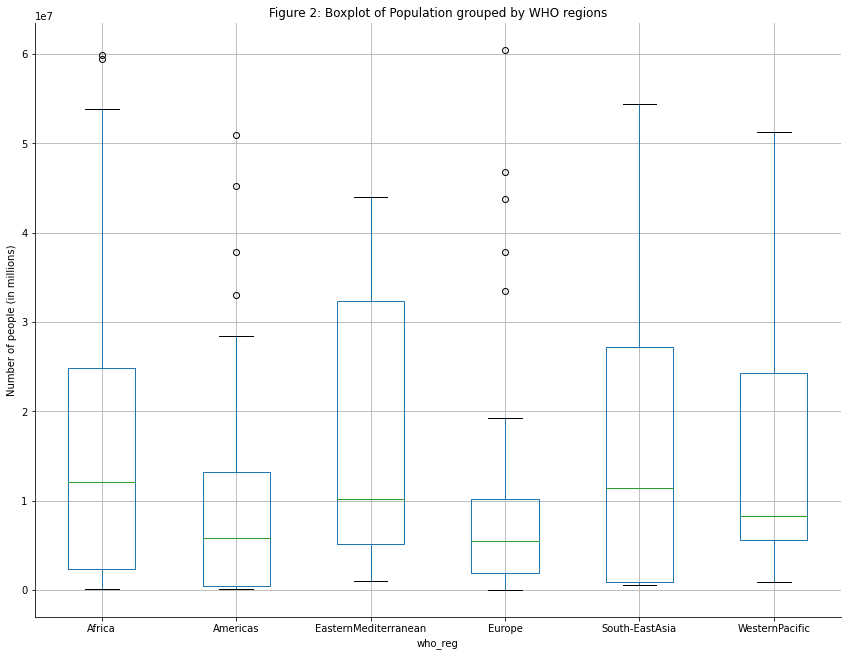

In [138]:
#plotting population grouped by WHO Region

bp2 = dfsub.boxplot(column = "Population", by = "who_reg", figsize= (14,11))
plt.ylabel("Number of people (in millions)") #labelling y-axis
plt.title("Figure 2: Boxplot of Population grouped by WHO regions") #adding title
bp2.get_figure().suptitle('') #removing pre-generated title

#removing right and top axis lines
bp2.spines['right'].set_visible(False)
bp2.spines['top'].set_visible(False)


Graph- Figure 2, displaying boxplots of the population of each country categorized by WHO regions, also shows the medians lying approximately towards the lower end of the distribution for each region. South-East Asia has the highest maximum value followed closely by Africa. The highest upper quartile is present in Eastern Mediterranean while the Inter-quartile range is highest for Eastern Mediterranean and South East Asia. America and Europe has the largest outlier in terms of magnitude although Europe has the smallest inter-quartile range.

In [139]:
#Summary statistics for Tests conducted every one million people

covid_df[["Tests/1M pop", "who_reg"]].groupby("who_reg").describe()

Tests/1M pop                                         \
                            count           mean            std      min   
who_reg                                                                    
Africa                       35.0   17039.057143   32609.394013    373.0   
Americas                     34.0   46193.147059   76707.129300   1616.0   
EasternMediterranean         20.0   92578.950000  154301.771624      4.0   
Europe                       53.0  139287.283019  187473.108360  13553.0   
South-EastAsia               10.0   30722.200000   49114.673657   2246.0   
WesternPacific               15.0   49628.466667   75521.562793   1206.0   

                                                              
                           25%      50%        75%       max  
who_reg                                                       
Africa                 1855.00   5600.0   13530.00  161389.0  
Americas              12662.00  20072.5   51994.25  423298.0  
EasternMediterranean   8627.25  38312.0   72240.75  531470.0  
Europe                57898.00  82799.0  151087.00  995282.0  
South-EastAsia         6331.75   9257.0   22818.00  158071.0  
WesternPacific         4501.00  11675.0   61879.00  251817.0

Tests/1M pop:

Table- This variable denotes the number of covid-19 tests conducted in each country, every one million people of its population. It is an independent discrete variable that essentially signifies the relative magnitude of testing in a country. From the summary statistics table "Tests/1M pop", the highest average is from the European region at almost 139287.28 tests conducted every 1 million people. In contrast, Africa has the smallest average of approximately 17039.05 tests conducted every 1 million people with 35 countries to account for. Similarly the standard deviations and medians, aligning with the mean, is highest in Europe, with 187473.10 and 82799, respectively, and smallest in Africa with 32609.39 and 5600, respectively.

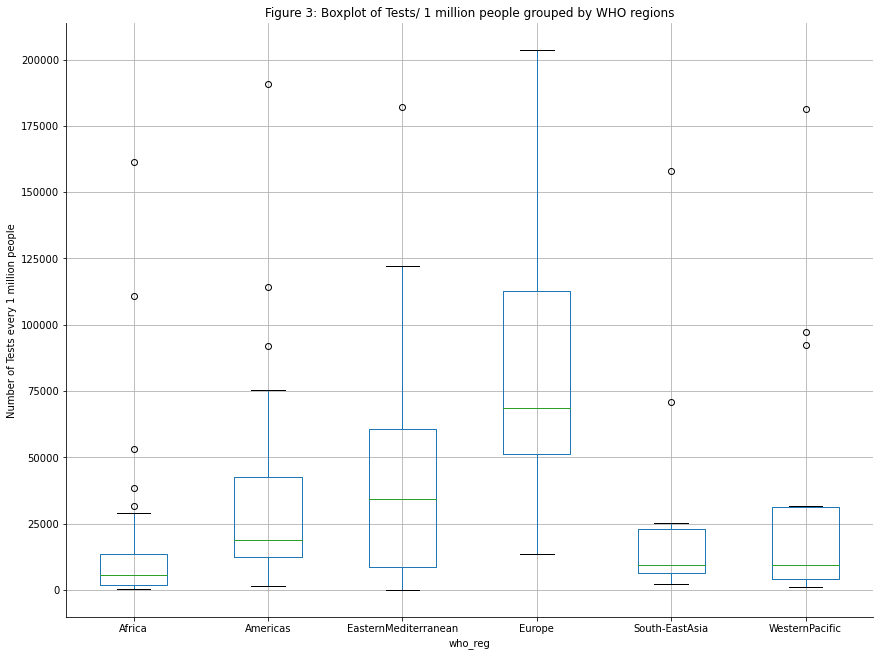

In [140]:
#plotting tests conducted every 1 million people grouped by WHO Region
bp3 = dfsub.boxplot(column = "Tests/1M pop", by = "who_reg", figsize= (14,11))
plt.ylabel("Number of Tests every 1 million people") #labelling y-axis
plt.title("Figure 3: Boxplot of Tests/ 1 million people grouped by WHO regions") #adding title
bp3.get_figure().suptitle('') #removing pre-generated title

#removing right and top axis lines
bp3.spines['right'].set_visible(False)
bp3.spines['top'].set_visible(False)


Graph- Figure 3, displays boxplots of covid-19 tests conducted every 1 million people of the population, categorized by WHO regions. The medians lie towards the lower end of the distribution for each region, except Eastern Mediterranean region. Europe has the highest median, upper-quartile, maximum number of tests and inter-quartile range with Africa being the least in all these factors. Each region displays several outliers, except Europe.


In [141]:
#Summary statistics for Global health risk scores 2019

covid_df[["Risk_Scores_19", "who_reg"]].groupby("who_reg").describe()

Risk_Scores_19                                           \
                              count       mean        std   min    25%   50%   
who_reg                                                                        
Africa                         43.0  45.209302  14.095859  22.0  34.50  44.0   
Americas                       31.0  59.677419  29.416987   0.0  53.00  69.0   
EasternMediterranean           18.0  61.277778  23.090119   0.0  49.75  64.5   
Europe                         49.0  71.408163  20.554722   0.0  62.00  74.0   
South-EastAsia                 10.0  60.200000  16.685323  34.0  51.75  61.5   
WesternPacific                 10.0  57.000000  38.236109   0.0  28.25  68.0   

                                   
                        75%   max  
who_reg                            
Africa                53.50  80.0  
Americas              78.00  99.0  
EasternMediterranean  75.75  96.0  
Europe                85.00  97.0  
South-EastAsia        71.50  85.0  
WesternPacific        90.00  95.0

Global Health Risk Score 2019:

Table- This variable denotes the health risk score each country received out of 100, by the World Health Organization. It is an independent discrete variable displaying the scores in the most recent year of 2019. The summary statistics table shows the average global health risk score to be highest in Europe, at almost 71, implying that the region is most likely to be at a health risk in case of a major disease outbreak. However, this could be due to the fact that the European region comprises of the largest number of countries, 49. The lowest average risk score of around 45 is given to Africa. Both South-East Asia and the Western Pacific comprise of only 10 country yet have quite high average risk scores at 60 and 57, respectively. The median score is the highest in America as the country with the maximum score of 99 lies in that region. All regions except Africa and South-East Asia have countries with minimum value of 0. The highest standard deviation of 38.24 is in the Western Pacific region implying variability in the health risk scores of the countries in that region.

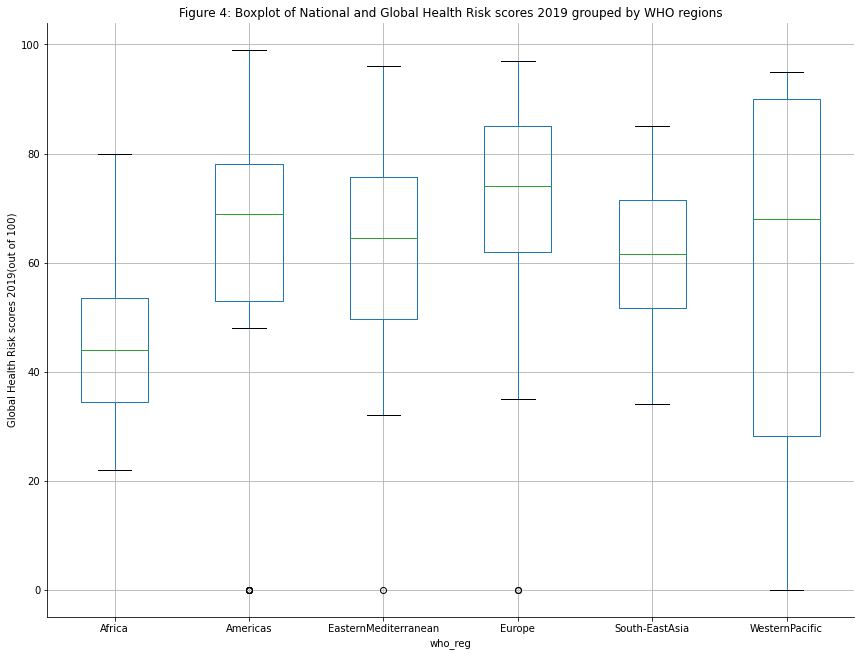

In [142]:
#plotting global health risk scores grouped by WHO Region  

bp4 = dfsub.boxplot(column = "Risk_Scores_19", by = "who_reg", figsize= (14,11))
plt.ylabel("Global Health Risk scores 2019(out of 100)") #labelling y-axis
plt.title("Figure 4: Boxplot of National and Global Health Risk scores 2019 grouped by WHO regions") #adding title
bp4.get_figure().suptitle('') #removing pre-generated title

#removing right and top axis lines
bp4.spines['right'].set_visible(False)
bp4.spines['top'].set_visible(False)

Graph- Figure 4 plots the Global health risk scores 2019 of countries, distinguished by World Health Organization’s regions in a boxplot. Eastern Mediterranean and South-East Asia has its median towards the middle of its distribution while Europe, America and Africa have its medians lie towards the upper portion of its distribution indicating the fact that most countries in those regions tend to have a higher risk score. The Western Pacific region has its median towards the lower end. Europe has an outlier in the lower end of the of its distribution indicating a country with extremely small health risk score, almost 0. Western Pacific has the largest inter-quartile range and the lowest lower- quartile, while Africa and South-East Asia have the smallest inter-quartile range. The highest upper - quartile belongs to Europe and the Western Pacific. The maximum value, close to 99, lies in America while every region contains at least one country with the minimum score of 0, except South-East Asia.


## 1.4. Summary

From the summary statistics, it is evident that that South-East Asia has the highest population. However, the highest number of cases occurs in America as per the summary table but the distribution of the data points this region to be Europe. In terms of the rapidity and efficiency of testing, Europe shows the maximum values. Despite covering 55 countries, Europe has the least population which might be a potential reason for its rapid testing. Given the population in South-East Asia, the average and median tests per 1 million people stands towards the lower end, signifying a difficulty in conducting rapid and sufficient tests. The average global health risk scores in the highest in Europe but may be due to the fact that the region comprises of the largest number of countries. Despite compriseing of smaller number countries, South-East Asia and Western Pacific have quite high average risks scores.

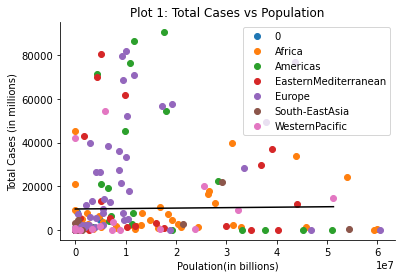

In [143]:
#Replace missing values in the new dataframe
dfsub= dfsub.replace('', np.nan).fillna(0)

#grouping by WHO Regions
groups = dfsub.groupby("who_reg")

#create intial plot
fig, ax = plt.subplots()

#plotting the relationship between Population and the Total Number of Cases

for name, group in groups:
    plt.plot(group["Population"], group["TotalCases"], marker="o",linestyle="", label=name)
plt.legend() #adding legend
plt.xlabel("Poulation(in billions)") #labelling x-axis
plt.ylabel("Total Cases (in millions)") #labelling y-axis
plt.title("Plot 1: Total Cases vs Population") #adding title

x= group["Population"]
y= group["TotalCases"]

ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')

#removing right and top axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



In order to determine if there is a correlation between the total number of cases with the population and tests conducted every one million people, respectively, two scatterplots are displayed. Plot 1 shows the relationship between the total number of cases(Y) and the population (X), categorized by WHO regions. The scatterplot shows a positive relationship between the two variables indicating that as the population increases, the total number of cases also increase. The correlation coefficient between the two variables is 0.546 (rounded off to three decimal places), indicating a positive correlation between the two variables. Most of the cases are concentrated towards the lower half of the graph. There are some outliers to be observed. America shows outliers, where the total number of cases in extremely high relative to the population whereas, South-East Asia shows an outlier whereby, the population is extremely high relative to the total number of cases. As previously established, this particular observation is the country of India. This signifies that America has much greater magnitude in terms of covid-19 outbreak since it has such a higher number of cases despite having a relatively less population.

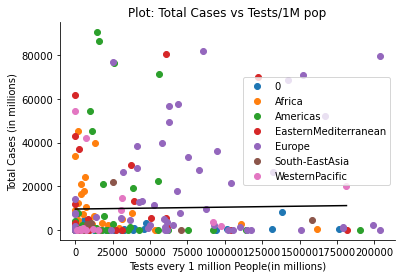

In [144]:
#create intial plot
fig, ax = plt.subplots()
#for loop for the scatter plot
for name, group in groups:
    plt.plot(group["Tests/1M pop"], group["TotalCases"], marker="o", linestyle= "",label=name)
plt.legend() #adding legend
plt.xlabel("Tests every 1 million People(in millions)") #labelling x-axis
plt.ylabel("Total Cases (in millions)") #labelling y-axis
plt.title("Plot: Total Cases vs Tests/1M pop") 

#set x and y for regression line
x= group["Tests/1M pop"]
y= group["TotalCases"]


ax.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='black')

#removing right and top axis lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Plot 2 establishes the relationship between the number of tests conducted every one million people (X) and the total number of cases (Y). The scatterplot shows a positive relationship between the variables implying that as tests conducted rise, the number of cases also rise which is reasonable, as positve cases would essentially be detected if more tests are conducted. The correlation coefficient is 0.0291 (rounded to three decimal places), indicating a weak, positive correlation between the two variables. Most of the observations are concentrated towards the bottom half of the graph. However, there are some outliers. Europe and the Eastern Mediterranean show a large number of tests being conducted every 1 million people compared to a relatively less number of cases whereas America shows a higher number of cases, compared to a relatively less number of tests being conducted every 1 million people. This signifies that America fares worse in terms of being infected by the virus despite not having as many tests conducted.


# <center> PROJECT 2 <centre>

## 2.1 Introduction


December 2019 saw the advent of Covid-19, a disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2), which led to an ongoing global pandemic, as declared in March 2020. The virus has infected over 100 million people and has caused more than 2 million deaths. The pandemic caused by the virus has led to nation-wide lockdowns, travel restrictions, economic disruptions and a rush to find a cure in the form of a vaccine. Even as newly produced vaccines are being tested in several countries as of 2021, and countries are slowly staring to open up, there are several new strains of the virus emerging, especially in the U.K and Africa, that are sending nations back into lockdowns.

The disease, itself, can show no to severe symptoms and can even be fatal. Health experts have encouraged the wearing of face-masks, social-distancing and maintaining hygiene as some of the preventive measures. The virus is especially fatal for people with underlying diseases as well as for elderly people.

This project aims to understand the relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest that might have potential correlation. The independent variables chosen initially are population of the country and the number of covid-19 tests conducted in each country for every 1 million people of the population. The dependent or response variable in this study is the total number of covid-19 cases in every country. In addition to the previous variables, we add a third independent variable, the health risk scores of countries.

The data has been obtained from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) which is supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL). It has been collected from several global entities such as the World Health Organization, Government health authorities in different countries, and data sources that have been tracking the logistics of the covid-19 disease and the global pandemic. The merged version of the datasets that has been used in this particular study, has been obtained from Kaggle.

The dataset from which the health risk scores have been obtained is from the World Health Organization’s “National and Global Health Risks” which assigns risk scores out of 100 to countries based on comprehensive assessment of leading risks to global health. 

This project focuses more on the visualizing the data that we have, particularly, the relationship between the dependent variables and the independent variables graphically. Moreover, to have a better understanding of the magnitude and spread of the variables on a global level, we plot maps. Section 2 focuses on graphical visualization of the relationship between the dependent and independent variable while section 3 focuses on maps.

#### THE MESSAGE:
###### The total number of Covid-19 cases in a country depend on certain factors pertaining to the country.


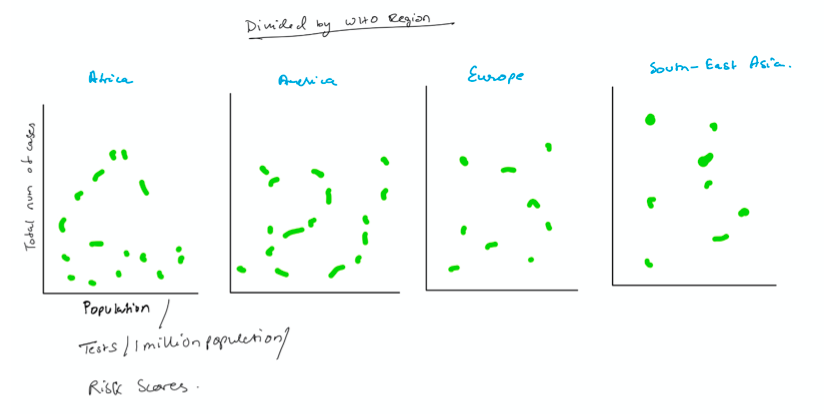

## 2.2 Visualization 

In [145]:
#Replace missing values in the new dataframe
dfsub= dfsub.replace('', np.nan).fillna(0)


Text(0.5, 0.98, 'Figure 1: Covid-19 Cases in WHO Region vs Population')

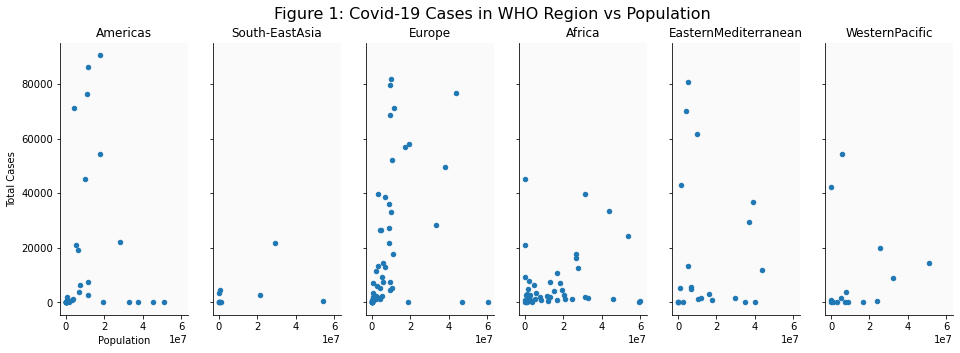

In [146]:
# Relationship between Total number of Covid-19 cases and the population of the country

#Function to create scatterplot

def single_scatter_plot(dfsub, who_reg, ax):
    """
    This function creates a single region's
    population to total covid-19 cases.
    """
    # Filter data to keep only the data of interest
    _df = dfsub.query("(who_reg == @who_reg)")
    _df.plot(
        kind="scatter", x="Population", y="TotalCases", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(nrows= 1, ncols= 6,figsize=(16, 5), sharex= True, sharey = True)

#Set background colour
bgcolor = (250/255, 250/255, 250/255)

#Create for loop to plot
for (i, who_reg) in enumerate(dfsub.who_reg.unique()):
    if i > 5:
        break
    single_scatter_plot(dfsub, who_reg, ax[i])
    ax[i].set_title(str(who_reg))
    
#Fine-tuning
for (i, _ax) in enumerate(ax):
    # Label axes
    if i == 0:
        _ax.set_xlabel("Population")
        _ax.set_ylabel("Total Cases")
    else:
        _ax.set_xlabel("")

    # Remove right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Setting background colour
    _ax.set_facecolor(bgcolor)

# Creating the plot title
fig.suptitle('Figure 1: Covid-19 Cases in WHO Region vs Population', fontsize=16)

Figure 1:

Figure 1 plots the relationship between the total number of covid-19 cases in a country and the population of that country in a scatterplot. Each country is categorized into their respective regions assigned by the World Health Organization. The figure shows each region in a different plot.
It can be observed that South-East Asia has the smallest number of observations while most of the observations are clustered towards the lower end of the graph America and Europe show a weak positive correlation indicating that higher the population of the country, higher is the total number of cases. However, the rest of the regions show a neutral relationship between the two variables which means that there is no relationship between the total number of covid-19 cases in a country and its population. America, Europe and the Eastern Mediterranean have the largest outliers in terms of magnitude. However, America shows a large number of covid-19 cases given a comparatively less population (slightly greater than 30 million) which might potentially cause the correlation.


Text(0.5, 0.98, 'Figure 2: Covid-19 Cases in WHO Region vs Tests/ 1 million population')

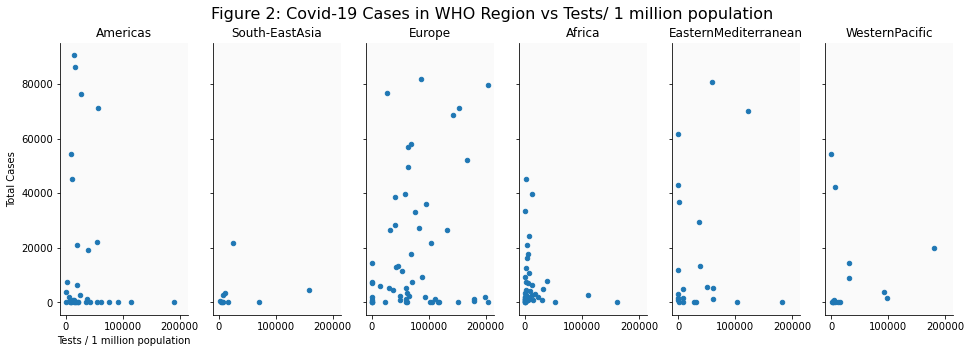

In [147]:
#Plotting the relationship between total number of covid-19 cases and the tests conducted 
#every 1 million people in the country.

#Function for scatterplot

def single_scatter_plot1(dfsub, who_reg, ax):
    """
    This function creates a single region's covid-19
    tests/1 million people to total covid-19 cases.
    """
    # Filter data to keep only the data of interest
    _df = dfsub.query("(who_reg == @who_reg)")
    _df.plot(
        kind="scatter", x = "Tests/1M pop", y="TotalCases", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(nrows= 1, ncols= 6,figsize=(16, 5), sharex= True, sharey = True)

#Set background colour
bgcolor = (250/255, 250/255, 250/255)

#For loop to create the scatter plot
for (i, who_reg) in enumerate(dfsub.who_reg.unique()):
    if i > 5:
        break
    single_scatter_plot1(dfsub, who_reg, ax[i])
    ax[i].set_title(str(who_reg))
    
#Fine-tuning the graph
for (i, _ax) in enumerate(ax):
    # Label the axes
    if i == 0:
        _ax.set_xlabel("Tests / 1 million population")
        _ax.set_ylabel("Total Cases")
    else:
        _ax.set_xlabel("")

    # Remove the right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Set background colour
    _ax.set_facecolor(bgcolor)

#Labelling the plot
fig.suptitle('Figure 2: Covid-19 Cases in WHO Region vs Tests/ 1 million population', 
             fontsize=16)

Figure 2:

Figure 2 plots the relationship between the total number of covid-19 cases in a country and the number of covid-19 tests conducted every 1 million people in a scatterplot. Similar to the previous figure each country is categorized into their respective regions assigned by the World Health Organization. The figure shows each region in a different plot.
It is observed that the number of observations is smallest in South-East Asia and largest in Europe and Africa. Most of the observations are clustered towards the bottom left of the graph. Europe has a random scattering of the data points indicating no correlation. Likewise, for other regions except Africa which is denoting a weak, positive correlation between the variables. America has some significant outliers where the number of covid-19 cases is quite high (around 80,000) given to a lower number of tests conducted (less than 10,000) compared to the outliers in the Eastern Mediterranean where the outliers show around 80,000 covid-19 cases for around 10,000 tests conducted every 1 million people.


Text(0.5, 0.98, 'Figure 3: Covid-19 Cases in WHO Region vs risk score of the country')

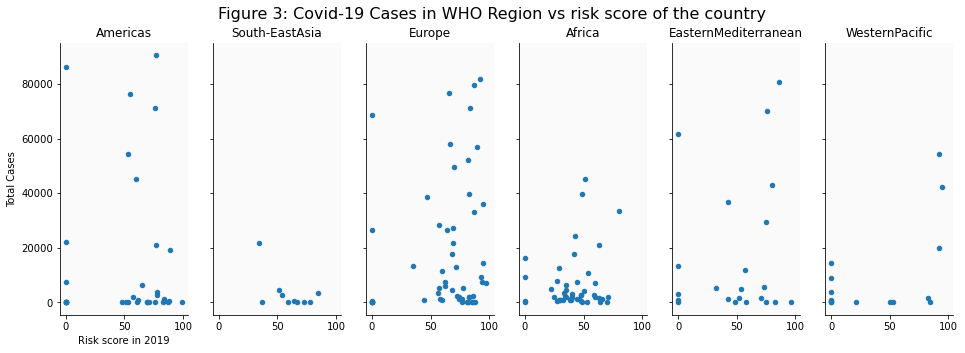

In [148]:
#Plotting the relationship between total number of covid-19 cases
#and the global health risk score in 2019.


#Function for scatterplot

def single_scatter_plot(dfsub, who_reg, ax):
    """
    This function creates a single region's
    risk score to total covid-19 cases.
    """
    # Filter data to keep only the data of interest
    _df = dfsub.query("(who_reg == @who_reg)")
    _df.plot(
        kind="scatter", x="Risk_Scores_19", y="TotalCases", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(nrows= 1, ncols= 6,figsize=(16, 5), sharex= True,sharey = True)


#For loop to create scatterplot
for (i, who_reg) in enumerate(dfsub.who_reg.unique()):
    if i > 5:
        break
    single_scatter_plot(dfsub, who_reg, ax[i])
    ax[i].set_title(str(who_reg))

#Fine-tuning the graph
for (i, _ax) in enumerate(ax):
    # Label the axes
    if i == 0:
        _ax.set_xlabel("Risk score in 2019")
        _ax.set_ylabel("Total Cases")
    else:
        _ax.set_xlabel("")

    # Remove the right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Set background colour
    _ax.set_facecolor(bgcolor)

#Creating the plot title
fig.suptitle("Figure 3: Covid-19 Cases in WHO Region vs risk score of the country", fontsize=16)

Figure 3:

Figure 3 plots the relationship between the total number of covid-19 cases in a country and the health risk score assigned to each country out of 100 by the World Health Organization, in a scatterplot. Similar to the previous two figures each country is categorized into their respective regions assigned by the World Health Organization. The figure shows each region in a different plot.
The largest number of observations is in Europe while the smallest numbers are in South East Asia and the Western Pacific. Most of the observations are clustered towards the bottom of the plot. Like the previous two figures, there appears to be no relationship between the two variables in the regions as there is a random scattering of data points. Every region except South-East Asia has some significant outliers. A country in America shows more than 80,000 cases for a smaller health risk score compared to the Western Pacific where the outliers show around 60,000 cases with a health risk score greater than 50%.

## 2.3. Maps


In this section we plot maps for each variable.The observations are plotted at a global level.Some countries have no data information and hence, the map colour in those specific country takes a bluish-white shade.

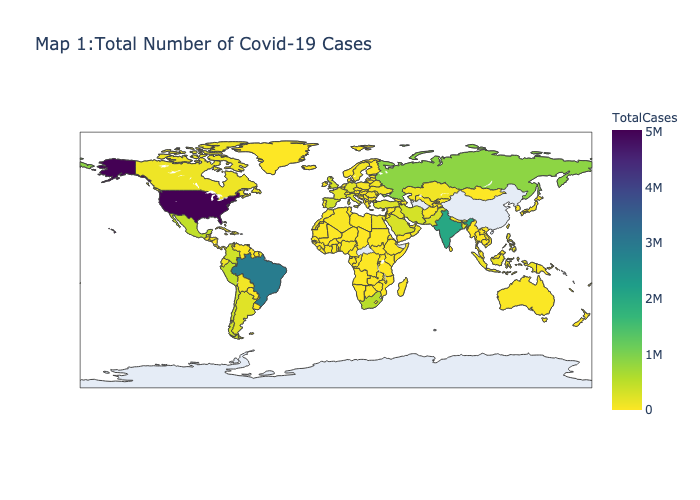

In [149]:
#Total number of covid-19 cases

#Remove index
world_data = covid_df.reset_index()

#Plot map
totca_fig = px.choropleth(world_data, locations="Country/Region", 
                          locationmode='country names',
                          color= "TotalCases", hover_name="Country/Region", 
                          title="Map 1:Total Number of Covid-19 Cases", 
                          hover_data= ["TotalCases"], 
                          color_continuous_scale="viridis_r", 
                          scope='world')
 


#Saving plotly image as a static image
totca_bytes = totca_fig.to_image(format="png")

Image(totca_bytes)

Map 1: The map shows the total number of covid-19 cases on a global level. The highest number of cases is in the United States followed by Brazil and then India with roughly 5 million, 4 million and 3 million cases respectively. Russia, South-American countries like Peru and Columbia as well as South-Africa are at around a million cases. Most of Africa, Greenland and Australia have the least number of cases, lying below a million.

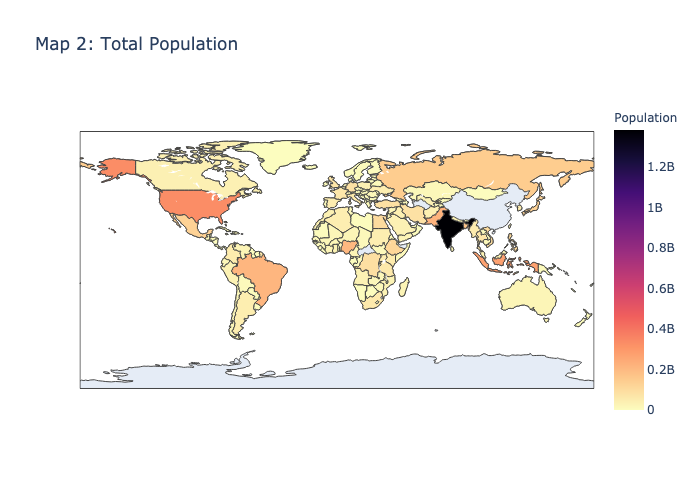

In [150]:
#Population of the countries

#Plot map
pop_fig = px.choropleth(world_data, locations="Country/Region", locationmode='country names', 
                  color= "Population", hover_name="Country/Region",
                  title="Map 2: Total Population", hover_data= ["Population"], 
                    color_continuous_scale="magma_r", scope='world')
 



#Saving plotly image as a static image
pop_bytes = pop_fig.to_image(format="png")

Image(pop_bytes)

Map 2: The map shows the total population in each country. India has the highest population with more than 1.2 billion people. It is easily a great distance away from the population of the rest of the countries. The United States has the second highest population at around 0.4 billion. Brazil, Pakistan and Nigeria seem to have a similar level of population at around 200 million. Australia, Greenland, Kazakhstan along with parts of northern Europe have relatively small population.

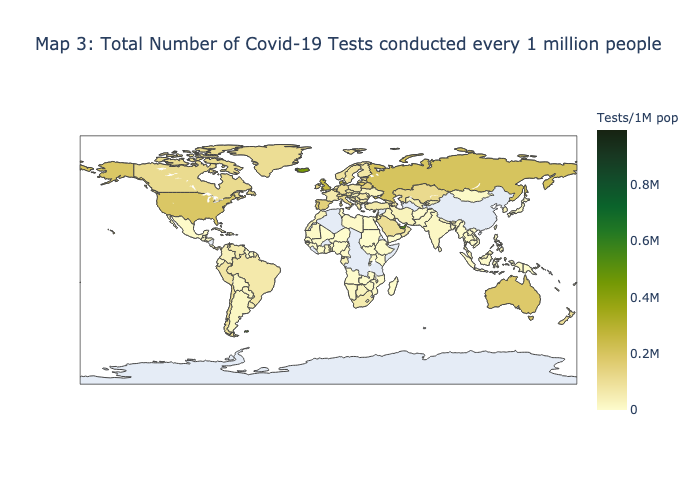

In [151]:
#Tests conducted every 1 million people

#Plot map
tests_fig = px.choropleth(world_data, locations="Country/Region", locationmode='country names', 
                  color= "Tests/1M pop", hover_name="Country/Region", 
                  title="Map 3: Total Number of Covid-19 Tests conducted every 1 million people", 
                          hover_data= ["Tests/1M pop"], 
                    color_continuous_scale="speed", scope='world')
 


#Saving plotly image as a static image
tests_bytes = tests_fig.to_image(format="png")

Image(tests_bytes)

Map 3: This map displays the number of tests conducted every one million people at a global level in each country. Russia has the highest number of tests at almost 200,000 followed closely by the United States and Australia in the higher 100,000 range. Canada follows with approximately 114,000 tests per million people while India and parts of Africa have the smallest number.

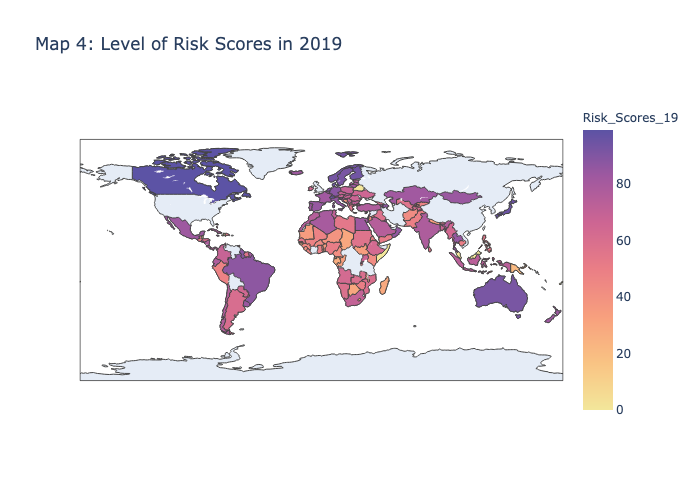

In [152]:
#Global health risk score in 2019

#Plot map
risk_fig = px.choropleth(world_data, locations="Country/Region", locationmode='country names', 
                  color= "Risk_Scores_19", hover_name="Country/Region", 
                  title="Map 4: Level of Risk Scores in 2019", 
                          hover_data= ["Risk_Scores_19"], 
                    color_continuous_scale="sunset", scope='world')



#Saving plotly image as a static image
risk_bytes = risk_fig.to_image(format="png")

Image(risk_bytes)

Map 4: The map displays the global health risk scores out of 100 assigned to each country in 2019 by the World Health Organization. The highest health risk score of is given to Canada in the 90s followed by Australia, Brazil and North-European countries like Sweden in the higher 80s and lower 90s. India, Kazakhstan, parts of Northern Africa and Mexico lie in lower 80s and high 70s. The smallest score, below 50, have been given to Malaysia, Botswana, Somalia and Belarus. It is clearly observed from the map that there are a lot of missing values.

# <center> PROJECT 3 <centre>

## 3.1. Introduction

December 2019 saw the advent of Covid-19, a disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2), which led to an ongoing global pandemic, as declared in March 2020. The virus has infected over 100 million people and has caused more than 2 million deaths. The pandemic caused by the virus has led to nation-wide lockdowns, travel restrictions, economic disruptions and a rush to find a cure in the form of a vaccine. Even as newly produced vaccines are being tested in several countries as of 2021, and countries are slowly staring to open up, there are several new strains of the virus emerging, especially in the U.K and Africa, that are sending nations back into lockdowns.
The disease, itself, can show no to severe symptoms and can even be fatal. Health experts have encouraged the wearing of face-masks, social-distancing and maintaining hygiene as some of the preventive measures. The virus is especially fatal for people with underlying diseases as well as for elderly people.

This project aims to understand the relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest that might have potential correlation. The independent variables chosen initially are population of the country and the number of covid-19 tests conducted in each country for every 1 million people of the population. The dependent or response variable in this study is the total number of covid-19 cases in every country. In addition to the previous variables, a third independent variable, the health risk scores of countries, was added. In order to further explore the correlation of the total number of covid-19 cases with other variable, we add the most recent average annual temperatures of countries as well as the percentage of population using basic sanitation in 2017, as potential independent variables. This is to explore whether climate and hygiene and sanitation levels affect the occurrence of the virus in countries in any way.

The data has been obtained from the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) which is supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL). It has been collected from several global entities such as the World Health Organization, Government health authorities in different countries, and data sources that have been tracking the logistics of the covid-19 disease and the global pandemic. The merged version of the datasets that has been used in this particular study, has been obtained from Kaggle.

The datasets from which the health risk scores and the basic sanitation levels have been obtained are from the World Health Organization’s “National and Global Health Risks”- assigns risk scores out of 100 to countries based on comprehensive assessment of leading risks to global health- and “ Basic and Safely Managed Sanitation Services” datasets, respectively. In this project, the most recent score in the year 2019 and the most recent year recorded for sanitation, 2017, are used and merged with the covid-19 world dataset in order to make the necessary comparisons. The health risk scores used have been collected using a self-assessment tool for annual reporting called the State Party Self-Assessment Annual Reporting Tool or SPAR. The SPAR (State Party Self-Assessment Annual Reporting) tool consists of 24 indicators for the 13 International Health Regulation capacities needed to detect, assess, notify, report and respond to public health risk and acute events of domestic and international concern.

The average annual temperatures have been obtained by HTML based web scraping of a Wikipedia page containing multiple tables. These tables displayed monthly and annual dynamic climate information pertaining to the most recent year.

This project focuses on obtaining additional independent variables through merging datasets or webscraping. Section 2 displays data obtained from webscraping and summarizes the data through visualizations and maps in subsections. Likewise, section 3 defines the data obtained through merging a new dataset and visualizes and summarizes the data through graphs and maps.

## SECTION 2

## 3.2.1.  DATA : Scraped
Since the aim of the project is to explore potential variables that affects the total number of covid-19 cases in a country, there is a possibility of exploring dynamic data, including most recent information available. There can be numerous sources of data that can be easily downloaded but it is tedious to constantly go back to check for the most updated version of the data. It is much easier to acquire the data through web scraping, especially if the data source is huge and complicated to search through.
The most prominent sources of data that provides potential variables related to our topic is the World Health Organization’s Global Health Observatory which is constantly acquiring and updating data regarding Covid-19 and other global socio-demographic and health factors. The GHO has two APIs, namely, GHO OData API and Athena API which allows us to scrape their datasets. It would be ideal to scrape the website monthly if one was looking for dynamic data to evaluate time series. However, for our purpose scraping the data annually would be sufficient.
Another source of data is Kaggle.com which contains multiple projects conducted by individuals. Most of these projects use datasets which are readily available and pertinent to the topic in this project. Instead of searching manually through the entire website, trying to find a relevant dataset, it would be much efficient to scrape the data using Kaggle’s own API. This would reduce the time and effort spent in searching for a relevant dataset. For this project, looking for variables that potentially affect the total number of Covid-19 cases in a country, we would ideally want the most recent information on political measures, country responses to the pandemic, medical accessibility in countries, etc. With Kaggle being a hub for researchers, there is are projects and datasets containing the relevant information which can be obtained through web scraping.
However, due to limited knowledge on web scraping especially converting API scraped data into text format, we are limiting ourselves to HTML based web scraping of the global temperatures.
The dataset used has been obtained by scraping Wikipedia via HTML based web scraping. It contains dynamic data featuring the monthly and annual temperature in different cities, in different countries. The temperatures are provided in Celsius and Fahrenheit scale. As this project works on a global and annual scale, we need to access the data and filter out the most recent average annual temperature in each country.

In [153]:
#import required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

To obtain the data, we need to first get the url of the website we are scraping from and then convert the HTML contents of the website into a readable and tidier format using BeautifulSoup. The soup object that we create basically contains the HTML code of the Wikipedia page that we intend to obtain our data from. We require multiple tables from the page, so we proceed to filter out the HTML code to find only the tables by entering their class and store all the tables and their contents in the variable, “data_table”. Then we extract the specific column names of the table and its contents and store them in a list called "values".


In [154]:
#obtain the url of the website 
web_url = 'https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature'
response = requests.get(web_url)

#convert to beautifulsoup object
soup_object = BeautifulSoup(response.content)

#find tables in the wikipedia page 
data_table = soup_object.find_all('table', {"class": ["sortable", "plainrowheaders"]})


# extract the column names
column_names = [item.get_text() for item in data_table[0].find_all('th')]

# extract the content
contents = [item.get_text() for item in data_table[0].find_all('td')]

# put all the content into a list
values=[]
for table in data_table:
    for item in table.select('td'):
        temp = item.get_text()
        values.append(temp)

As there are 16 columns in the tables, we obtain the number of rows by dividing all the values, i.e, the contents of the tables, by the row number. This is done so that we can reshape the table.

In [155]:
# Since there are 16 columns, obtain the number of rows and reshape the table
len(values)/16 


453.0

As there are 453 rows, we re-shape the table accordingly and create a dataframe called "climate_raw" which contains information from all the wikipedia tables.

In [156]:
# change the shape of the table
data = np.reshape(values,(453,16))

#set up column names
headers = ['Country/Region','City', 'Jan','Feb', 'March', 'April', 'May', 'June',
          'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec', 'Year_temp', 'Ref']

# put all the data into a dataframe
climate_raw = pd.DataFrame(data = data, columns =headers)

climate_raw

,Country/Region,City,Jan,Feb,March,April,May,June,July,August,Sept,Oct,Nov,Dec,Year_temp,Ref
0,Algeria\n,Algiers\n,11.2(52.2)\n,11.9(53.4)\n,12.8(55.0)\n,14.7(58.5)\n,17.7(63.9)\n,21.3(70.3)\n,24.6(76.3)\n,25.2(77.4)\n,23.2(73.8)\n,19.4(66.9)\n,15.2(59.4)\n,12.1(53.8)\n,17.4(63.3)\n,[1]\n
1,Algeria\n,Tamanrasset\n,12.8(55.0)\n,15.0(59.0)\n,18.1(64.6)\n,22.2(72.0)\n,26.1(79.0)\n,28.9(84.0)\n,28.7(83.7)\n,28.2(82.8)\n,26.5(79.7)\n,22.4(72.3)\n,17.3(63.1)\n,13.9(57.0)\n,21.7(71.1)\n,[2]\n
2,Algeria\n,Reggane\n,16.0(60.8)\n,18.2(64.8)\n,23.1(73.6)\n,27.9(82.2)\n,32.2(90.0)\n,36.4(97.5)\n,39.8(103.6)\n,38.4(101.1)\n,35.5(95.9)\n,29.2(84.6)\n,22.0(71.6)\n,17.8(64.0)\n,28.3(82.9)\n,[3]\n
3,Angola\n,Luanda\n,26.7(80.1)\n,28.5(83.3)\n,28.6(83.5)\n,28.2(82.8)\n,27.0(80.6)\n,23.9(75.0)\n,22.1(71.8)\n,22.1(71.8)\n,23.5(74.3)\n,25.2(77.4)\n,26.7(80.1)\n,26.9(80.4)\n,25.8(78.4)\n,[4]\n
4,Benin\n,Cotonou\n,27.3(81.1)\n,28.5(83.3)\n,28.9(84.0)\n,28.6(83.5)\n,27.8(82.0)\n,26.5(79.7)\n,25.8(78.4)\n,25.6(78.1)\n,26.0(78.8)\n,26.7(80.1)\n,27.6(81.7)\n,27.3(81.1)\n,27.2(81.0)\n,[5]\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Peru\n,Lima\n,22.1(71.8)\n,22.7(72.9)\n,22.2(72.0)\n,20.6(69.1)\n,18.8(65.8)\n,17.5(63.5)\n,16.7(62.1)\n,16.2(61.2)\n,16.4(61.5)\n,17.3(63.1)\n,18.7(65.7)\n,20.7(69.3)\n,19.2(66.6)\n,[380]\n
449,Peru\n,Piura\n,26.8(80.2)\n,27.8(82.0)\n,27.8(82.0)\n,26.6(79.9)\n,24.5(76.1)\n,22.9(73.2)\n,21.8(71.2)\n,21.9(71.4)\n,22.3(72.1)\n,22.9(73.2)\n,23.6(74.5)\n,25.2(77.4)\n,24.5(76.1)\n,[381]\n
450,Suriname\n,Paramaribo\n,26.0(78.8)\n,26.0(78.8)\n,26.2(79.2)\n,26.7(80.1)\n,26.5(79.7)\n,26.5(79.7)\n,26.7(80.1)\n,27.4(81.3)\n,27.8(82.0)\n,27.9(82.2)\n,27.3(81.1)\n,26.4(79.5)\n,26.8(80.2)\n,[382]\n
451,Uruguay\n,Montevideo\n,23.0(73.4)\n,22.5(72.5)\n,20.6(69.1)\n,17.2(63.0)\n,14.0(57.2)\n,11.1(52.0)\n,10.9(51.6)\n,11.7(53.1)\n,13.4(56.1)\n,16.0(60.8)\n,18.6(65.5)\n,21.3(70.3)\n,16.7(62.1)\n,[383]\n


The dataframe "climate_raw" contains 451 rows and 16 columns. It features all the tables and their contents from the Wikipedia page. The Country names and cities with their respective monthly and annual data is shown. However, this dataframe needs to be cleaned for our use. Firstly, each cell has "\n" trailing behind the entries, which is required to be removed. Moreover, we are only working at a country and annual level, thereby, requiring only the countries' recent annual temperature, given under "Year_temp". We filter these out to create a new dataframe called 'climate_2'.


In [157]:
#cleaning dataframe

#removing \n
climate_1 = climate_raw.replace('\n', '', regex=True)

#selecting only required columns
climate_2 = climate_1[["Country/Region", "Year_temp"]]


climate_2

,Country/Region,Year_temp
0,Algeria,17.4(63.3)
1,Algeria,21.7(71.1)
2,Algeria,28.3(82.9)
3,Angola,25.8(78.4)
4,Benin,27.2(81.0)
...,...,...
448,Peru,19.2(66.6)
449,Peru,24.5(76.1)
450,Suriname,26.8(80.2)
451,Uruguay,16.7(62.1)


The new dataframe contains the countries and the corresponding temperature in celsuis and fahrenheit. We will be working with temperature in celsius only so we remove the fahrenheit figures in parenthesis and convert our temperature values to a numeric type in order to continue our analysis. Since there are multiple entries for a single country due to different cities having different temperatures, we keep only the average of all temperatures for a each country. Hence, our dataframe contains the countries and the most recent average annual temperature over their cities in Celsius in the dataframe called "climate_fresh".

In [158]:
#Remove parenthesis and contents within it
climate_2['Year_temp'] = climate_2.loc[:,"Year_temp"].str.replace(r'\(.*\)', '')

#Convert temperatures from object to numeric type
climate_2["Year_temp"] = climate_2.loc[:,"Year_temp"].apply(pd.to_numeric, downcast='float', errors='coerce')

#Obtaining mean temperature over cities
climate_fresh = climate_2.groupby("Country/Region").mean()
climate_fresh

,Year_temp
Country/Region,
Afghanistan,12.100000
Albania,15.200000
Algeria,22.466667
Andorra,9.800000
Angola,25.799999
...,...
Venezuela,22.000000
Vietnam,23.675000
Yemen,24.550000


In [159]:
#Merge with main covid dataframe
covid_df = pd.merge(covid_df, climate_fresh, on= "Country/Region", how='left')


We finally merge our scraped dataframe with the main Covid-19 dataframe that we have been using in this project.

## 3.2.2.  Summary Statistics
In our initial model, we had chosen four variables to work with. The independent variables (X) are population of the countries, the number of covid-19 tests that have been conducted every 1 million people of the population and the global health risk scores in 2019. The dependent variable (Y) is the total number of covid-19 cases in each country. We now display summary statistics for the new variable, which is the annual average temperature of countries, considering it as a new independent variable.
After removing a number of significant outliers in each variable using the inter-quartile range method, observations between 25% and 75% of the numerical data has been subsetted into a new dataframe and used to plot a histogram in order to better visualize the distribution of the data.

In [160]:
#function to remove outliers
def Remove_Outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    truelist = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return truelist

#List of the values within the inter-quantile range
non_Outlier = Remove_Outlier(covid_df)

# Non-Outlier Subset of the Given Dataset
dfsub = covid_df[non_Outlier]

In [161]:
#Summary statistics for average yearly temperature

covid_df[["Year_temp", "who_reg"]].groupby("who_reg").describe()

Year_temp                                             \
                         count       mean       std        min        25%   
who_reg                                                                     
Africa                    32.0  24.529271  3.094843  17.750000  22.466667   
Americas                  27.0  22.323867  5.165911   6.063636  20.802273   
EasternMediterranean      18.0  22.491759  4.722565  12.100000  19.200000   
Europe                    50.0  11.391967  4.163593   4.000000   9.150000   
South-EastAsia             8.0  25.922396  3.163886  18.299999  26.175000   
WesternPacific            13.0  23.671326  4.843271  12.944444  23.000000   

                                                       
                            50%        75%        max  
who_reg                                                
Africa                25.437500  26.940000  29.299999  
Americas              22.700001  26.750000  28.000000  
EasternMediterranean  21.567500  26.125000  29.900000  
Europe                10.550000  14.408333  20.000000  
South-EastAsia        26.881250  27.487500  28.000000  
WesternPacific        25.600000  27.000000  28.400000

Average Annual Temperature:
Table- This variable denotes the most recent average annual temperature of each country in degree Celsius. It is an independent continuous variable displaying the temperatures in the most recent year. The summary statistics table shows the average annual temperature to be highest in South-East Asia followed by Africa, at almost 26 degrees Celsius and 25 degrees Celsius, implying that the regions are hottest due to them lying in the tropical zone, near the equator. The lowest average annual temperature of around 11 degrees Celsius is in Europe as Europe lies in the Northern Hemisphere. The highest standard deviation of 5 is in the American region implying variability in the temperatures across the region. Africa has the highest average annual temperature of almost 30 degrees. The inter-quartile range is highest in the Eastern Mediterranean region, and lowest in the South-East Asia suggesting the fact that in countries South-East have mostly the same high temperature all year round.

Text(0.5, 0.98, 'Figure 5: Histogram of average Yearly temperature grouped by WHO regions')

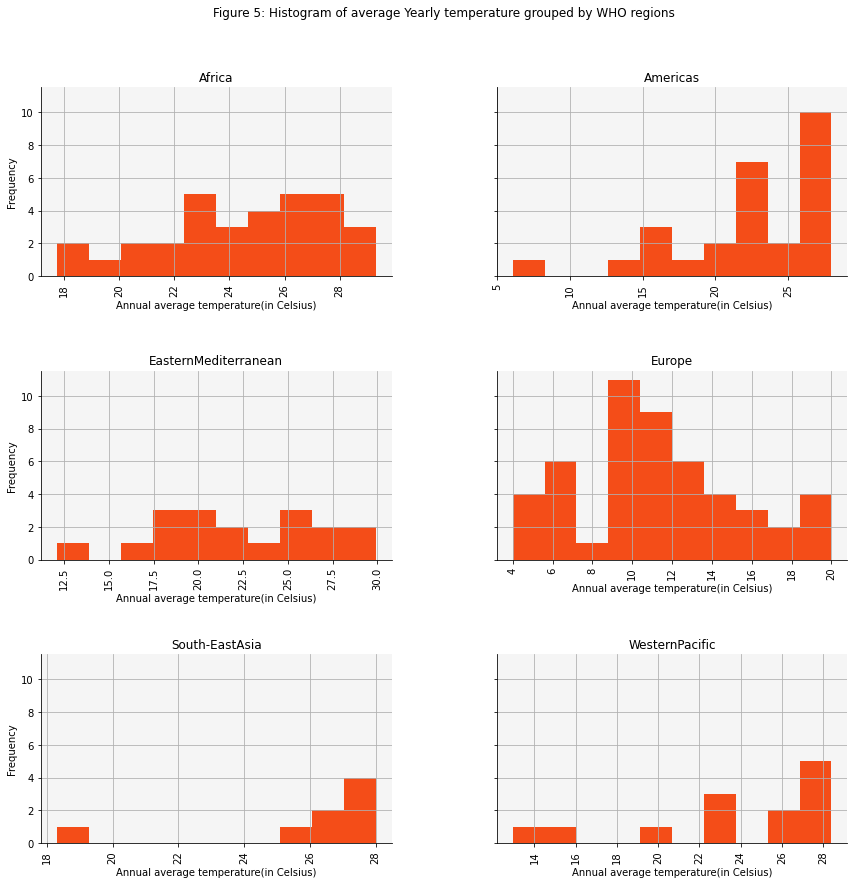

In [162]:
#plotting histogram of Annual average temperature grouped by WHO Region  

#creating histogram
bp5 = covid_df.hist(column = "Year_temp", by = "who_reg", figsize= (14,14),
                    color=(244/255, 77/255, 24/255), sharey =True)


for ax in bp5.flatten():
    ax.set_xlabel("Annual average temperature(in Celsius)") #setting labels
    ax.set_ylabel("Frequency") 
    ax.spines['right'].set_visible(False) #removing spines
    ax.spines['top'].set_visible(False)
    ax.set_facecolor((0.96, 0.96, 0.96)) #setting background colour
    ax.grid() #adding grid lines

plt.suptitle("Figure 5: Histogram of average Yearly temperature grouped by WHO regions") #adding title





Graph- Figure 5 plots the Average Annual temperature of countries, distinguished by World Health Organization’s regions in histograms. Africa and the Eastern Mediterranean region have a more or less even distribution of temperature ranging from 18-30 degrees Celsius, except for an outlier in the Eastern Mediterranean region at 12.5 degrees. The medians lie somewhere in the lower 20 degrees for both these regions. Europe and America have a multimodal distribution with Europe being positively skewed and America being negatively skewed. America shows an outlier at an extremely low temperature of around 6-7 degrees which can be Greenland, since it lies in the extreme northern hemisphere. The median is somewhere around 20 degrees while Europe has a much lower median between 10-12 degrees. Both South-East Asia and the Western Pacific are negatively skewed with outliers. The distribution is sparse since both these regions have fewer countries. South-East Asia has a high median temperature in the higher 20 degrees while the Western Pacific has its somewhere between 22-24 degrees. South-East Asia has a unimodal distribution while the Western Pacific has a bimodal one.



## 3.2.3 Visualization

In [163]:
#Replace missing values in the new dataframe
dfsub= dfsub.replace('', np.nan).fillna(0)

In order to better visualize the relationship between the dependent (y) and independent variable (x), individual scatterplots are plotted, distinguished by World Health Organization's regional distribution. The scatterplot plots the total number of covid-19 cases against the predictor variable. This is to explore whether any of the regions show correlation.

Text(0.5, 0.98, 'Figure 4: Covid-19 Cases in WHO Region vs Average Yearly Temperature of the country')

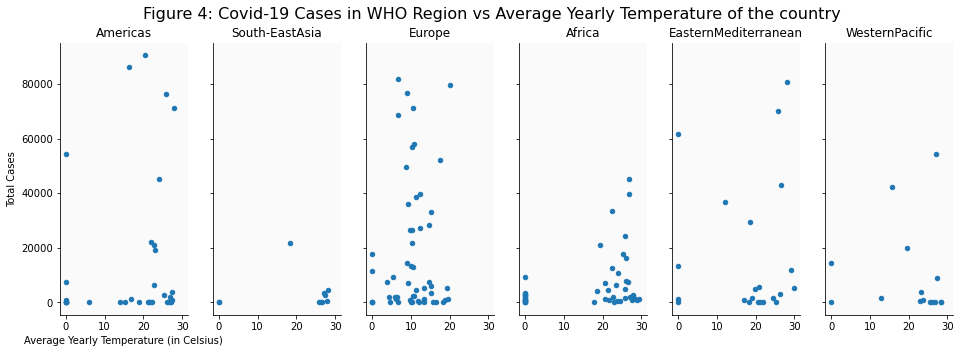

In [164]:
#Plotting the relationship between total number of covid-19 cases
#and the average yearly temperature.


#Function for scatterplot

def single_scatter_plot(dfsub, who_reg, ax):
    """
    This function creates a single region's
    population to total covid-19 cases.
    """
    # Filter data to keep only the data of interest
    _df = dfsub.query("(who_reg == @who_reg)")
    _df.plot(
        kind="scatter", x="Year_temp", y="TotalCases", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(nrows= 1, ncols= 6,figsize=(16, 5), sharex= True,sharey = True)


#For loop to create scatterplot
for (i, who_reg) in enumerate(dfsub.who_reg.unique()):
    if i > 5:
        break
    single_scatter_plot(dfsub, who_reg, ax[i])
    ax[i].set_title(str(who_reg))

#Fine-tuning the graph
for (i, _ax) in enumerate(ax):
    # Label the axes
    if i == 0:
        _ax.set_xlabel("Average Yearly Temperature (in Celsius)")
        _ax.set_ylabel("Total Cases")
    else:
        _ax.set_xlabel("")

    # Remove the right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Set background colour
    _ax.set_facecolor(bgcolor)

#Creating the plot title
fig.suptitle("Figure 4: Covid-19 Cases in WHO Region vs Average Yearly Temperature of the country", fontsize=16)

Figure 4:

Figure 4 plots the relationship between the total number of covid-19 cases in a country and the average annual temperature of the country, grouped by the World Health Organization regions, in scatterplots.

The largest number of observations is in Europe and Africa while the smallest number is in South East Asia. Most of the observations are clustered towards the bottom of the plot towards a higher temperature. Like the previous three figures, there appears to be no relationship between the two variables in most of the regions as there is a random scattering of data points. This may be due to the lack of observations. Every region except South-East Asia has some significant outliers. A country in America shows more than 80,000 cases for a higher temperature compared Europe where the outliers show around 60,000 cases at lower temperatures.

## 3.2.4. Maps

In this section we plot a map for the climate variable.The observations are plotted at a global level. Some countries have no data information and hence, the map colour in those specific country takes a bluish-white shade.

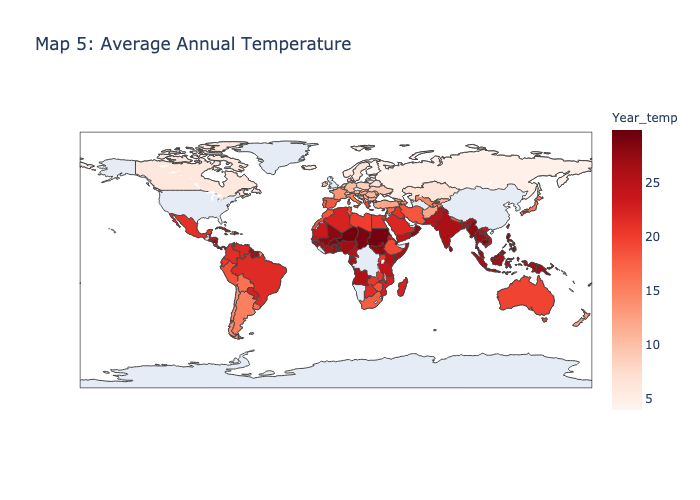

In [165]:
#Average Annual Temperature 

#Plot map
temp_fig = px.choropleth(covid_df, locations="Country/Region", locationmode='country names', 
                  color= "Year_temp", hover_name="Country/Region", 
                  title="Map 5: Average Annual Temperature", 
                          hover_data= ["Year_temp"], 
                    color_continuous_scale="reds", scope='world')


#Saving plotly image as a static image
temp_bytes = temp_fig.to_image(format="png")

Image(temp_bytes)

Map 5: This map displays the average annual temperature of each country in degree Celsius. The deeper the colour red, higher is the temperature of the particular country. As can be observed Africa has some of the hottest countries given its proximity to the equator. Most of Africa, India, the Middle-Eastern countries, South American countries like Brazil and Columbia, as well as the islands in the Indian Ocean like Indonesia boast some of the higher temperatures at around 20-25 degrees, given the fact that they lie in the tropical zone. Australia lies at around 20 degrees. Ad we move further north, the temperature decreases drastically as seen in Ukraine and the European countries. Canada, Russia and Sweden have some of the lowest average annual temperature at around 4-6 degrees.

## SECTION 3

## 3.3.1.  DATA : Merged


To further expand our pool of variables to determine what affects the total number of Covid-19 cases in a country, we add another variable. The dataset has been obtained from the World Health Organization’s Global Health Observatory which records global medical and socio-demographic variables like global immunization, availability of medical supplies, expenditure on health facilities, etc.

The variable to be explored is the basically the percentage of population in a country using basic sanitation. As recommended by global health practioners, one of the important preventative measures for Covid-19 is to maintain proper and frequent hygiene and sanitation. Hence, we would like to explore whether this level of basic sanitation among the population of a country affects the total number of cases in the country.

In [166]:
#read dataset
san_raw = pd.read_csv("/Users/ankheepaul/Desktop/ECO225/project 3/sanitation.csv")

#replace missing values
san = san_raw.replace('', np.nan).fillna(0)
san = san_raw.replace('No data', np.nan).fillna(0)
san

,Country,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,0,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using at least basic sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...,Population using safely managed sanitation ser...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,43,62,37,0,0,0,42,60,36,...,22,0,0,0,24,30,22,0,0,0
3,Albania,98,98,97,40,40,39,98,98,97,...,83,38,40,37,88,97,82,39,40,38
4,Algeria,88,90,82,18,16,21,88,90,82,...,73,19,18,19,84,91,72,19,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),94,0,0,24,0,0,94,0,0,...,0,0,0,0,0,0,0,0,0,0
192,Viet Nam,84,94,78,0,0,0,82,94,76,...,45,0,0,0,52,81,43,0,0,0
193,Yemen,59,88,43,0,67,0,59,88,43,...,27,0,67,0,42,86,27,0,67,0
194,Zambia,26,36,19,0,0,0,26,36,19,...,12,0,0,0,24,46,12,0,0,0


The dataset records the percentage of population in a country that uses basic sanitation facilities. The data is recorded on an annual basis and differentiates between rural and urban areas as well as the total population in the country, as a whole. As Covid-19 happened in 2019, we look at the most recent year of sanitation level which is 2017.
Once the dataset has been obtained and filtered we merge it with our main Covid-19 dataframe that contains all the relevant variables required for this project.

In [167]:
#subset most recent required columns to create a new dataframe
san_sub = san[["Country", '2017']]

#drop first two rows
san_clean = san_sub.drop(san_sub.index [ [ 0,1 ] ])

#rename columns
san_clean = san_clean.rename(columns = {'2017':'basic_sanitation(%)', 
                                        "Country" : "Country/Region"},
                                           inplace = False)


In [168]:
#merge with main covid dataframe
covid_df = pd.merge(covid_df, san_clean, on= "Country/Region", how='left')

In [169]:
#convert variable to numeric type
covid_df["basic_sanitation(%)"] = covid_df.loc[:,"basic_sanitation(%)"].apply(pd.to_numeric, downcast='float', errors='coerce')

## 3.3.2. Summary Statistics


We have explored the previous 4 independent variables (X), which are population of the countries, the number of covid-19 tests that have been conducted every 1 million people of the population, the global health risk scores in 2019, and the annual average temperature of countries. The dependent variable (Y) is the total number of covid-19 cases in each country. We now display summary statistics for the new variable, which is the percentage of population using basic sanitation in 2017, considering it as a new independent variable.
After removing a number of significant outliers in each variable using the inter-quartile range method, observations between 25% and 75% of the numerical data has been subsetted into a new dataframe and used to plot a boxplot in order to better visualize the distribution of the data.


In [170]:
#function to remove outliers
def Remove_Outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    truelist = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return truelist

#List of the values within the inter-quantile range
non_Outlier = Remove_Outlier(covid_df)

# Non-Outlier Subset of the Given Dataset
dfsub = covid_df[non_Outlier]

In [171]:
#Summary statistics for basic sanitation level in 2017 grouped by WHO region

covid_df[["basic_sanitation(%)", "who_reg"]].groupby("who_reg").describe()

basic_sanitation(%)                                    \
                                   count       mean        std   min   25%   
who_reg                                                                      
Africa                              43.0  38.093023  25.025524   0.0  18.0   
Americas                            31.0  77.870968  28.603895   0.0  82.0   
EasternMediterranean                18.0  81.333333  23.830282  37.0  61.0   
Europe                              49.0  97.306122   3.554364  84.0  97.0   
South-EastAsia                      10.0  72.400000  19.004093  48.0  60.5   
WesternPacific                      10.0  80.200000  29.150186  13.0  63.5   

                                           
                       50%     75%    max  
who_reg                                    
Africa                36.0   49.00  100.0  
Americas              88.0   92.00  100.0  
EasternMediterranean  94.0  100.00  100.0  
Europe                99.0   99.00  100.0  
South-EastAsia        66.5   90.25   99.0  
WesternPacific        97.5  100.00  100.0

Percentage of population using basic sanitation in 2017: Table- This variable denotes the percentage of population using basic sanitation, in each country, grouped by the World Health Organization region. It is an independent discrete variable displaying the basic sanitation level in the most recent year of 2017. The summary statistics table shows that the highest average is in Europe at almost 97% which means that almost all the population in European countries have good access and usage of basic sanitation facilities and maintain proper hygiene- a fact also emphasized by the lowest standard deviation of 3. The lowest average lies in Africa denoting the lack of practice of basic sanitation by a majority of the population. Indicating that this region might have higher number of covid-19 cases. There are countries in Africa and the American region where 0% of the population use basic sanitation. The standard deviation is highest in the Western Pacific and followed by the American region signifying that the regions have countries with varying level of usage of basic sanitation.



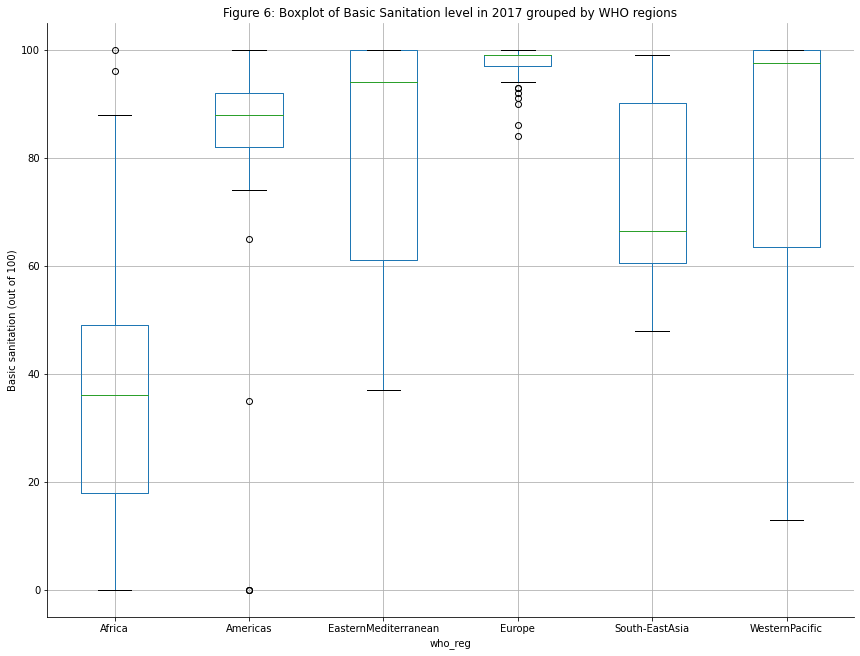

In [172]:
#boxplot of basic sanitation level in 2017 grouped by WHO region

bp6 = covid_df.boxplot(column = "basic_sanitation(%)", by = "who_reg", figsize= (14,11))
plt.ylabel("Basic sanitation (out of 100)") #labelling y-axis
plt.title("Figure 6: Boxplot of Basic Sanitation level in 2017 grouped by WHO regions") #adding title
bp6.get_figure().suptitle('') #removing pre-generated title

#removing right and top axis lines
bp6.spines['right'].set_visible(False)
bp6.spines['top'].set_visible(False)


Graph- Figure 6 plots the percentage of population practicing basic sanitation in each country in 2017, distinguished by World Health Organization’s regions, in a boxplot. The European region has the highest median followed by Western Pacific. The lowest median, lower- quartile and upper-quantile belong to Africa. The Eastern Mediterranean has the highest inter-quartile range while Europe has the smallest. America and Europe have the largest number of outliers towards a lower level of the population using basic sanitation.


## 3.3.3. Visualization

## Graph

In order to better visualize the relationship between the dependent (y) and independent variable (x), individual scatterplots are plotted, distinguished by World Health Organization's regional distribution. The scatterplot plots the total number of covid-19 cases against the predictor variable. This is to explore whether any of the regions show correlation.

Text(0.5, 0.98, 'Figure 5: Covid-19 Cases in WHO Region vs Percentage of Population using Basic Sanitation in 2017 ')

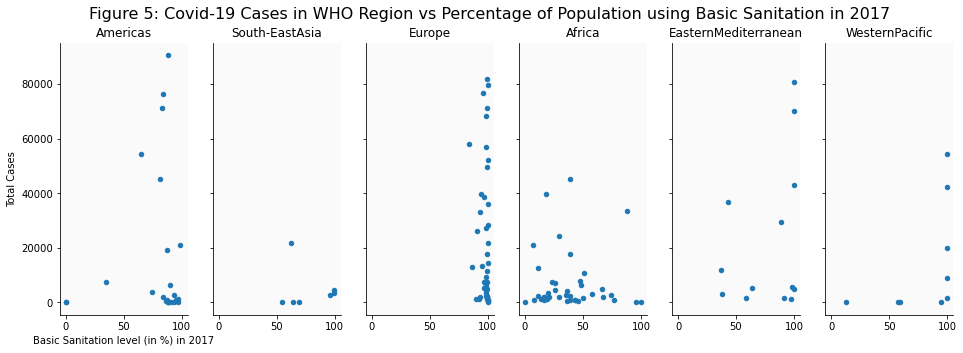

In [173]:
#Plotting the relationship between total number of covid-19 cases
#and the basic sanitation level in percentage in 2017


#Function for scatterplot

def single_scatter_plot(dfsub, who_reg, ax):
    """
    This function creates a single region's
    population to total covid-19 cases.
    """
    # Filter data to keep only the data of interest
    _df = dfsub.query("(who_reg == @who_reg)")
    _df.plot(
        kind="scatter", x="basic_sanitation(%)", y="TotalCases", ax=ax
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(nrows= 1, ncols= 6,figsize=(16, 5), sharex= True,sharey = True)


#For loop to create scatterplot
for (i, who_reg) in enumerate(dfsub.who_reg.unique()):
    if i > 5:
        break
    single_scatter_plot(dfsub, who_reg, ax[i])
    ax[i].set_title(str(who_reg))

#Fine-tuning the graph
for (i, _ax) in enumerate(ax):
    # Label the axes
    if i == 0:
        _ax.set_xlabel("Basic Sanitation level (in %) in 2017")
        _ax.set_ylabel("Total Cases")
    else:
        _ax.set_xlabel("")

    # Remove the right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Set background colour
    _ax.set_facecolor(bgcolor)

#Creating the plot title
fig.suptitle("Figure 5: Covid-19 Cases in WHO Region vs Percentage of Population using Basic Sanitation in 2017 ",
             fontsize=16)

Figure 5:

Figure 5 plots the relationship between the total number of covid-19 cases in a country and the percentage of population using basic sanitation. Similar to the previous figures each country is categorized into their respective regions assigned by the World Health Organization. The figure shows each region in a different plot.

The largest number of observations is in Europe and Africa while the smallest number is in South East Asia. Most of the observations are clustered towards the bottom of the plot. Like the previous figures, there appears to be no relationship between the two variables in most of the regions as there is a random scattering of data points. This may be due to the lack of observations. Every region except South-East Asia has some significant outliers. Europe, America and the Western Pacific has a percentage of its population using basic sanitation, yet face a large number of cases. Africa has some of its countries showing a smaller percentage population using basic sanitation which face lower number of cases.



## Maps

In this section we plot maps for the variable.The observations are plotted at a global level.Some countries have no data information and hence, the map colour in those specific country takes a bluish-white shade.

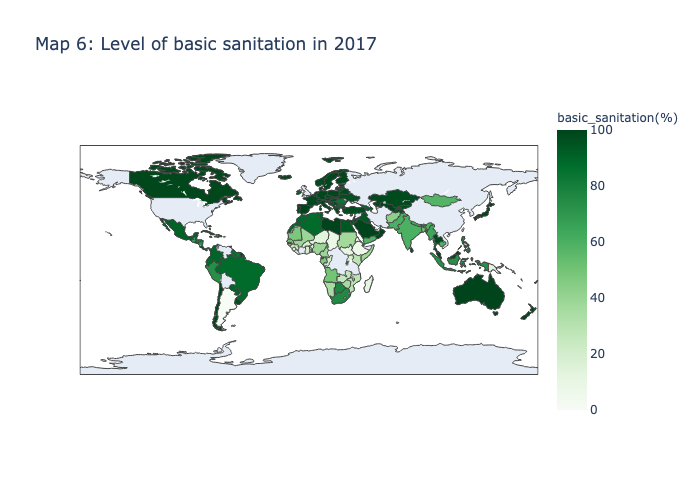

In [174]:
#Basic Sanitation level in 2017

#Plot map
sanit_fig = px.choropleth(covid_df, locations="Country/Region", locationmode='country names', 
                  color= "basic_sanitation(%)", hover_name="Country/Region", 
                  title="Map 6: Level of basic sanitation in 2017", 
                          hover_data= ["basic_sanitation(%)"], 
                    color_continuous_scale="greens", scope='world')


#Saving plotly image as a static image
sanit_bytes = sanit_fig.to_image(format="png")

Image(sanit_bytes)

Map 6:This map displays the percentage of population using basic sanitation in a country in 2017. Canada, European countries, Chile, Kazakhstan and Australia boast some of the highest percentages close to 98%. Mexico, Brazil, Peru, Algeria and Saudi Arabia also have higher percentages, at around 90% of their population using basic sanitation in 2017. Most of the South-African countries like Nigeria and Sudan show less than 50% of their population using basic sanitation. There are also a number of countries who have missing data.


# <center> FINAL PROJECT  <centre>

December 2019 saw the advent of Covid-19, a disease caused by severe acute respiratory syndrome coronavirus 2(SARS-CoV-2), which led to an ongoing global pandemic, as declared in March 2020. The virus has infected over 100 million people and has caused more than 2 million deaths. The pandemic caused by the virus has led to nation-wide lockdowns, travel restrictions, economic disruptions and a rush to find a cure in the form of a vaccine. Even as newly produced vaccines are being tested in several countries as of 2021, and countries are slowly staring to open up, there are several new strains of the virus emerging, especially in the U.K and Africa, that are sending nations back into lockdowns. 

This project aims to understand the relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest that might have potential correlation. The independent variables chosen initially are population of the country and the number of covid-19 tests conducted in each country for every 1 million people of the population. The dependent or response variable in this study is the total number of covid-19 cases in every country. In addition to the previous variables, a third independent variable, the health risk scores of countries, was added. In order to further explore the correlation of the total number of covid-19 cases with other variable, we add the most recent average annual temperatures of countries as well as the percentage of population using basic sanitation in 2017, as potential independent variables. This is to explore whether climate and hygiene and sanitation levels affect the occurrence of the virus in countries in any way.

The previous projects focused on acquiring and visualizing the data and the chosen variables. This final project explores the research question in depth. Since the aim is to infer a potential relationship between the total number of covid-19 cases and socio-demographic variables such as population as well as other variables of interest, we use multilinear regression.

The regression section focuses on running multiple regression models to determine the most appropriate independent variables. The machine learning section uses machine learning techniques to produce regression trees and use the mean squared error to determine the most appropriate independent variables.

## Regression

This section runs various regression models on the dependent variable which is the total number of Covid-19 cases in a country. The chosen independent variables are the population of the country, the number of covid-19 tests conducted every 1 million people in the country and the annual average temperature of the country. Additional standardized independent variables such as the global health risk scores in 2019 and the level of basic sanitation usage in a country in 2017- scores given by the World Health Organization- have also been considered for the model.

The independent variables in our regression models have been carefully chosen. The population of a country and the number of tests conducted every one million people in the population helps determine the number of covid-19 cases that occurs in the country. The susceptibility of a country to the virus in terms of how much risk the population of that country is at, if there is a potential health risk, is measured by the global health risk scores. The global health risk score of the most recent year of 2019, given by the World Health Organization might help determine the magnitude of cases in a country. 

Since the onset of Covid-19, global health experts have been advising people to wear masks, use sanitizers and maintain proper hygiene as a preventive measure. Hence, the level of basic sanitization used in a country, as determined by the World Health Organization, may potentially be related to the number of cases occurring in a country. Moreover, in the initial stages of the pandemic, there were numerous reports and speculation about the virus being correlated to the weather. In an article by the Huffington Post, it was hypothesized that the virus spreads in colder weather (Link: https://www.huffingtonpost.ca/entry/cold-weather-spread-covid-explainer_ca_5ff78146c5b612d958ea6d29). Although this hypothesis is still being explored as numerous new variants arise, it might be a potential predictor and hence, has been chosen in this project as an independent variable.

Our aim is to infer what may cause the total number of covid-19 cases in a country. Five regression models are run with the first one being a simple linear regression and the subsequent ones adding our chosen independent variables at a time.  For the variables with extremely large values, we convert them to the logarithmic form to define a change in those variables. This comprises of population, the total number of covid-19 cases, and the tests per one million people and the average annual temperature being converted to logarithmic values. 



In [191]:
#!pip install linearmodels

In [192]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [193]:
#obtain log values
covid_df['log_pop'] = np.log(covid_df['Population'])
covid_df['log_totcase'] = np.log(covid_df['TotalCases'])
covid_df['log_tests'] = np.log(covid_df['Tests/1M pop'])
covid_df['log_temp'] = np.log(covid_df['Year_temp'])
 

In [194]:
#create new dataframe with variables of interest
reg_raw = covid_df[['Country/Region', "log_totcase", "log_pop","log_tests", "log_temp",
                  "basic_sanitation(%)", "Risk_Scores_19", "who_reg"]]




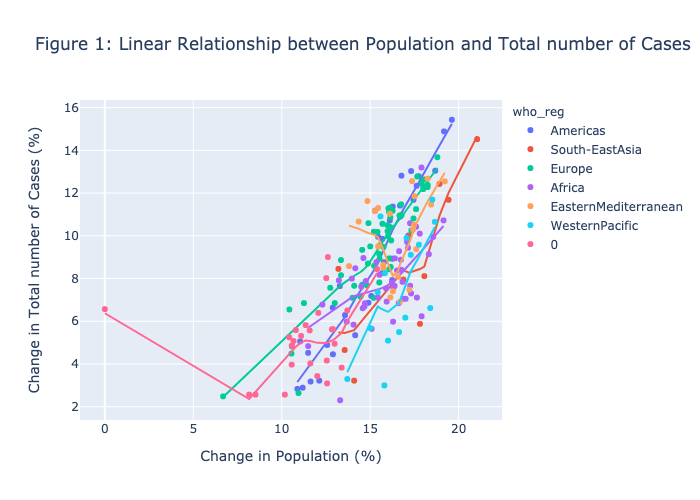

In [195]:
#create plot to show linearity
reg_plot = reg_raw.replace('', np.nan).fillna(0)


log_lin = px.scatter(reg_plot, x="log_pop", y="log_totcase", 
                     color="who_reg", trendline="lowess",
                     labels = {
                         "log_pop": "Change in Population (%)",
                         "log_totcase": "Change in Total number of Cases (%)"
                     }, 
                    title="Figure 1: Linear Relationship between Population and Total number of Cases")

log_lin_bytes =log_lin.to_image(format="png")

Image(log_lin_bytes)



Given that most of the variables chosen (except temperature) are discrete variables that either define a socio-demographic characteristic or is a standardized score, it can be assumed that the relationship between the dependent and independent variable is linear. Moreover, a non-linear relationship between the dependent and the independent variables emerge only if the dependent variable is a non-linear function of the independent variable. Among the variables chosen, the total number of covid-19 cases in the country can only be a function of the population and the tests conducted every one million people of the population. In both these cases, the dependent variable is a proportion of the independent variable. Hence the relationship between the dependent and the independent variables is linear. 

Figure 1 displays the linear relationship between the change in Population and the change in the total number of Covid-19 cases. Although the relationship seems positive and negative at times, there is a clearly a linear relationship between the two variables since the line of best fit is a straigt one.


In [196]:
#create constant
reg_raw['const'] = 1

In [197]:
# Create lists of variables to be used in each regression
X1 = ['const', 'log_pop']
X2 = ['const', 'log_pop', 'log_tests']
X3 = ['const', 'log_pop', 'log_tests', 'log_temp']
X4 = ['const', 'log_pop', 'log_tests', 'log_temp', 'basic_sanitation(%)']
X5 = ['const', 'log_pop', 'log_tests', 'log_temp', 'basic_sanitation(%)', 'Risk_Scores_19']



In [198]:
# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(reg_raw['log_totcase'], reg_raw[X1], missing='drop').fit()
reg2 = sm.OLS(reg_raw['log_totcase'], reg_raw[X2], missing='drop').fit()
reg3 = sm.OLS(reg_raw['log_totcase'], reg_raw[X3], missing='drop').fit()
reg4 = sm.OLS(reg_raw['log_totcase'], reg_raw[X4], missing='drop').fit()
reg5 = sm.OLS(reg_raw['log_totcase'], reg_raw[X5], missing='drop').fit()



In [199]:
from statsmodels.iolib.summary2 import summary_col
info_dict={ 'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [200]:
results_table = summary_col(results=[reg1,reg2,reg3, reg4, reg5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                        'Model 4', 'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'log_pop', 
                                             'log_tests', 
                                             'log_temp', 
                                             'basic_sanitation(%)',
                                             'Risk_Scores_19'])
#results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


                    Model 1   Model 2   Model 3   Model 4   Model 5 
--------------------------------------------------------------------
const               -5.19*** -14.10*** -12.86*** -13.23*** -13.14***
                    (0.81)   (1.07)    (1.86)    (1.91)    (1.93)   
log_pop             0.88***  1.06***   1.03***   1.03***   1.02***  
                    (0.05)   (0.05)    (0.06)    (0.07)    (0.07)   
log_tests                    0.63***   0.61***   0.54***   0.53***  
                             (0.06)    (0.08)    (0.09)    (0.09)   
log_temp                               -0.18     0.02      0.04     
                                       (0.28)    (0.29)    (0.30)   
basic_sanitation(%)                              0.01      0.01     
                                                 (0.01)    (0.01)   
Risk_Scores_19                                             0.00     
                                                           (0.01)   
R-squared           0.58     0.75

The table above shows that coefficients obtained for each predictor in the different models. The coefficients for all the predictor variables, except temperature, is positive. An increase in the population growth as well as a positive change in the tests per one million people and temperature leads to a positive increase in the total number of cases. Moreover, the risk scores and basic sanitation level show almost no correlation with the total number of cases in a country. A positive change in the average annual temperature, that is, an increase in the average annual temperature of a country is correlated with a fall in the number of covid-19 cases in Model 3. The coefficients for population and tests per one million people are significant at 1% significance level.

The most appropriate model that we select is Model 2 comprising of two predictors, namely, the population growth and the change in the tests conducted per one million people. This is because this model has the highest R square adjusted. Adding further predictors decrease the R square adjusted, or rather the goodness of the fit, implying that the predictors do not contribute relevant information regarding the dependent variable. However, model 4 has the smallest Akaike’s information criterion of 438.8. The smaller the AIC of the model, the better it is. Given that the additional variables;  global health risk scores has an extremely small coefficients close to zero which is insignificant and lower adjusted R square, we choose to ignore it despite it having the smallest AIC.


Our research question which aimed to determine whether there is a relationship between the total number of Covid-19 cases in a country and the chosen variables is explored through the regression models. Since the models with basic sanitization level and global health risk scores have insignificant coefficients close to zero and low adjusted R square, we can conclude that there is no relationship between the variables and the total number of cases in the country. However, population change and the change in the tests conducted every 1 million people in the population have a positive relationship with the dependent variable implying they are relevant predictors. Temperature change has a negative relationship with the dependent variable as shown in Model 3. However, when we add temperature as a predictor variable, the adjusted R square decreases implying that the variation in the change in temperature does not explain much of the variation in the dependent variable. 

Under model  2 $\beta_1$ indicates that a percentage change in population leads to a 1.06% change in the total number of covid-19 cases in the country, on average. Similarly $\beta_2$ indicates that a percentage change in tests conducted every 1 million people leads to a 0.63 % change in the total number of covid-19 cases in the country, on average. Thus, Model 2, being the optimal model in this project, implies that population change and change in the tests conducted every 1 million people in the population are relevant predictors of the number of covid-19 cases in a country.






## Machine Learning

In [201]:
reg_clean= reg_raw.replace('', np.nan).fillna(0)



In the previous section we ran a number of regression models and chose Model 2 which had the highest R square adjusted. The model had two predictor variables; the population change and the change in the number of tests conducted every one million people. 

The equation for our chosen regression model is:

$$
\log(\text{TotalCases}) = \beta_0 + \beta_1\log(\text{Population}) +
\beta_2 \log(\text{Tests/1M pop}) + \epsilon
$$

where $\beta_1 $ and $ \beta_2 $ are the coefficients of regression which gives us the relationship between the predictor variables and the dependent variable. This implies that the coefficients explains the percentage change in the total number of covid-19 cases for a % change in the population and tests conducted every one million people, respectively.

$  \epsilon $ is the error term.

The algorithm will choose the parameters that minimize the mean squared error (MSE) function. Hence to minimize the MSE we need to first convert our data to a vector/matrix form which is:

$$
\underbrace{\begin{bmatrix} \log(\text{TotalCases}_1) \\ \log(\text{TotalCases}_2) \\ \vdots \\ \log(\text{TotalCases}_N)\end{bmatrix}}_Y = \underbrace{\begin{bmatrix} 1 & \log(\text{Population}_1) &  \log(\text{Tests/1M pop}_1) \\ 1 & \log(\text{Population}_2) & \log(\text{Tests/1M pop}_2) \\ \vdots & \vdots & \vdots \\ 1 & \log(\text{Population}_N) & \log(\text{Tests/1M pop}_N \end{bmatrix}}_{X} \underbrace{\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}}_{\beta} + \epsilon
$$

Hence the objective function to minimize the absolute value of the Mean Square Error is:

$$
\frac{1}{N} \sum_{i=1}^N (y_i - X_i \beta)^2 = \frac{1}{N} \| y - X \beta\|_2^2
$$

where $y_i$ is the fitted value of log(TotalCases), $X_i$ is the matrix containing the dependent variables, and $\beta$ is the matrix of coefficients of interest. 


In [202]:
X_df = reg_clean.drop(["log_totcase", "Country/Region", "who_reg"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X_df):
    X_df[col] = X_df[col].astype(float)
X_df.head()





,log_pop,log_tests,log_temp,basic_sanitation(%),Risk_Scores_19,const
0,19.618227,12.158142,0.000000,0.0,0.0,1.0
1,19.175444,11.036260,3.077888,88.0,87.0,1.0
2,21.046323,9.682529,3.268301,60.0,78.0,1.0
3,18.798712,12.224026,1.549688,0.0,0.0,1.0
4,17.899494,10.878877,2.876386,76.0,70.0,1.0


The table above shows the independent variables chosen to run our regression.

In [203]:
y = reg_clean["log_totcase"] 
y = y.astype(float)
y.head()

0    15.431364
1    14.886259
2    14.521282
3    13.678423
4    13.195956
Name: log_totcase, dtype: float64

In [204]:
from sklearn import tree
covid_tree_1 = tree.DecisionTreeRegressor(max_depth=3).fit(X_df,y)

In [205]:
from sklearn import metrics
y_pred_tree_1 = covid_tree_1.predict(X_df)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 2.174182383829566


The average squared difference between the predicted value of total number of cases and the actual value of it is 2.17.

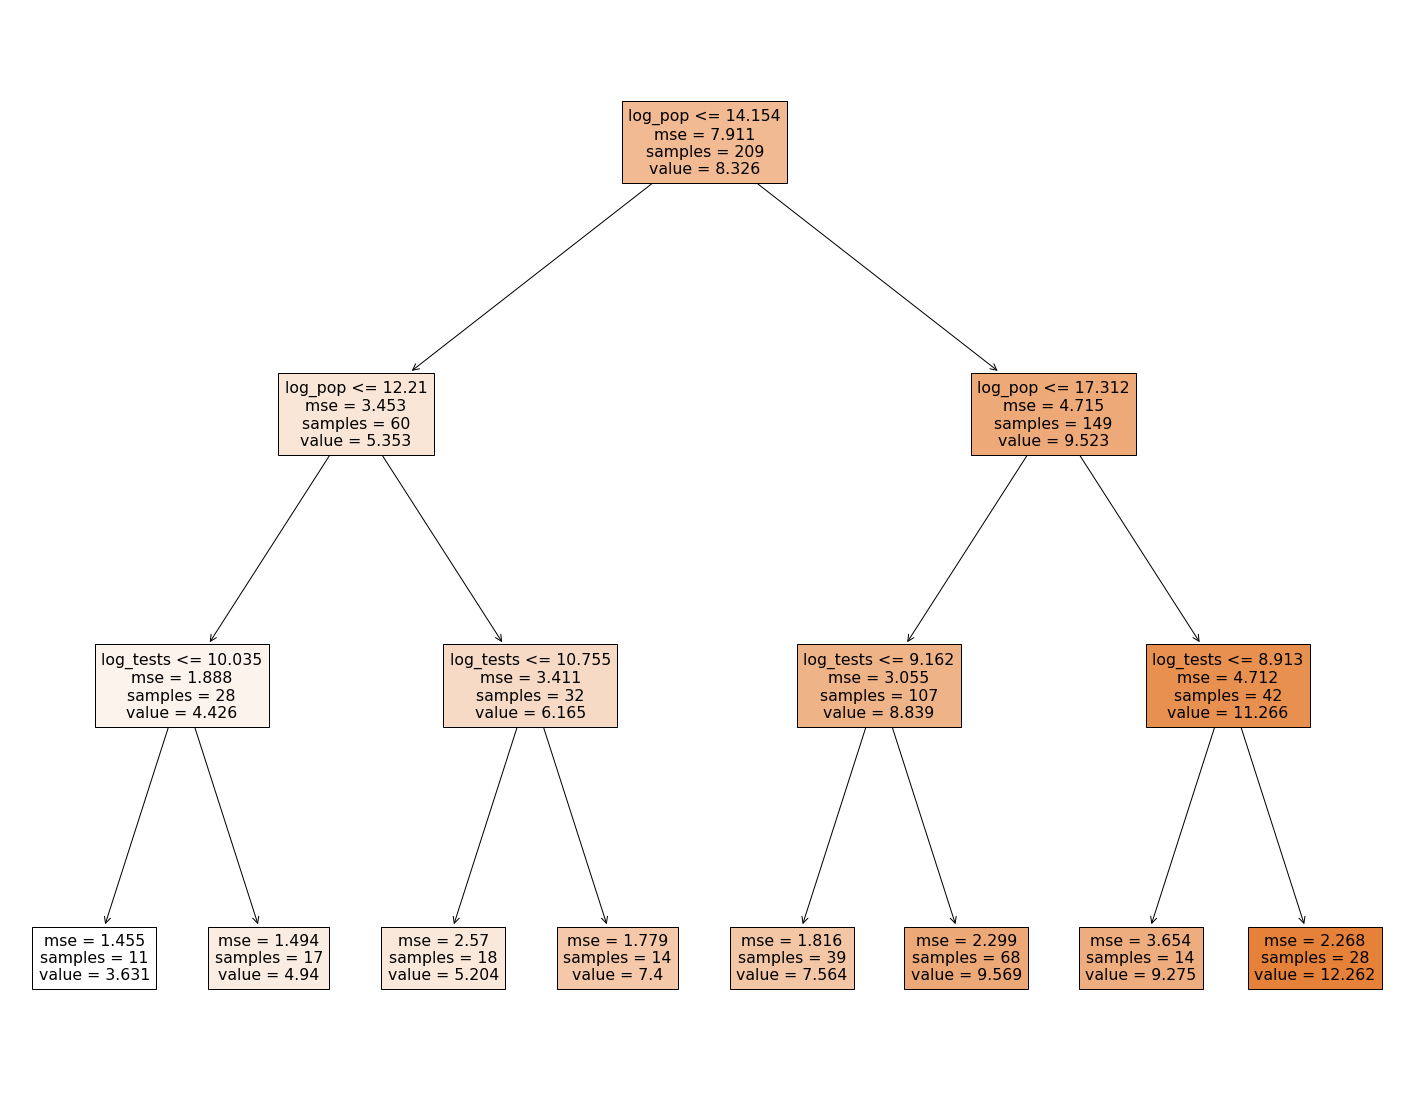

In [206]:
covidtree_fig = plt.figure(figsize=(25,20))
covidtree_fig = tree.plot_tree(covid_tree_1, feature_names=X_df.columns, filled=True)

Our regression tree first examines the variable log(population) which determines the population change. It splits the data into two parts based on the average population change being 14.154. This means the left branch displays the countries with average population change being less than 14.154 and the right branch displays the countries with average population change being more than 14.154. The Mean square error is 7.911.

The first node on the left branch further splits the data into two parts the average population change being 12.21. The branches from this node moves down to the divide further between the change in tests conducted every one million people based on cutoffs of 10.035 and 10.755, repectively. The MSE for the left branch is lower at 1.888.

The first node on the right  branch further splits the data into two parts the average population change being 17.312. The branches from this node moves down to the divide further between the change in tests conducted every one million people based on cutoffs of 9.162 and 8.913, repectively. The MSE for the left branch is lower at 3.055. Note that as the average population change increases, the average change in tests conducted every one million people becomes less.


The mean squared error, on the other hand, decreases as we add the predictors but increases with higher average values of the independent variables. Compared to our OLS model, this model provides us with the mean squared error which minimizes the distance between the fitted value for total number of cases and the actual value for it. The smaller this distance, the more accurate our prediction would be if we wanted to use our model to predict the total number of cases in a country. However, our aim is to infer the relationship between the dependent and the independent variables which makes our OLS model more appropriate.


## Weaknesses and Future Work

 In an attempt to explore the potential relationship between the total number of covid-19 cases and other socio-demographic variables, we began by choosing population and the number of tests conducted every 1 million people in a country as independent variables. We, then, proceeded to considered adding global health risk scores in 2019 and the level of basic sanitization usuage in a country, assigned by the World Health Organization as independent variable in addition to socio-demographic factors. We added the climate of the countries as well. However we noticed no relevant relationship between each of the variables and the total number of Covid-19 cases in a country, through visualizing them by graphs and maps. 

To explore our research question in depth, five regression models were examined and the R square adjusted was use to choose the most appropriate model. This particular model contained the change in population and the change in the number of tests conducted every 1 million people in a country as independent variables and showed a positive relationship between each of these with the change in the total number of covid-19 cases. 

However, our model has a number of weaknesses. To begin with, there are a lot of missing values in our data. Moreover, the most appropriate model has a higher AIC compared to other models. Moreover, there may be multicollinearity between the predictor variables implying that the predictor variables may be correlated among themselves. This would lead to the problem of confounders and hence, the variation in the change in the total number of cases may not be just due to the variation of a particular independent variable. There may also be a lot of outliers in the data. Finally, correlation among the variables does not imply causation. Hence we cannot say that the change in population or the tests conducted cause the a change in the total number of cases.

In future, it would be beneficial to explore the outliers to check for leverage points. The potential confounders and the Gauss-Markov conditions for OLS can be examined by checking for multicollinearity. Moreover, if we want to establish causation then controls are to be considered and a randomized test, through instrumental variables, could be considered.


## Conclusion


 As the covid-19 pandemic continues to affect millions of people and nations worldwide, there are already a number of variants of the virus as well as vaccines. Studies all over the world are being conducted to find potential cures and causes. In this particular paper, we try to determine the effect of socio-demographic and various other variables on the total number of covid-19 cases in every country. Choosing population, the number of covid-19 tests conducted every 1 million people and global health risk score in 2019 as our initial independent variables, and the total number of covid-19 cases as our dependent variable, we calculate the summary statistics for them by categorizing each country into World Health Organization’s regional divisions.

 We also used HTML based web scraping to obtain climate information from Wikipedia as well as the World Health Organization's Global Health Observatory to get an idea about  countries' basic sanitaiton usage. These factors were used as independent variables and explored to determine their relevance to covid-19 cases in countries. 

 Moreover, we plot the relationship between the response variable with each of the independent variables through scatterplots and maps, and discover no correlation for most of the variables. Therefore, to explore our research question in depth, multiple regression models were examined and the R square adjusted was use to choose the most appropriate model. This particular model contained the change in population and the change in the number of tests conducted every 1 million people in a country as independent variables and showed a positive relationship between each of these with the change in the total number of covid-19 cases. Machine learning methods were also used to construct regression trees and use the mean squared error to determine the independent variables that served as best predictors. However, since our aim was inference rather than prediction, we chose the most  appropriate model from the OLS regressions conducted.
 
  The optimal model obtained in this paper has the change in total number of covid-19 cases as the dependent variable and the change in population and test conducted every one million people, as the independent variables. The coefficients obtained show a positive linear relationship between the independent and dependent variables. The coefficients are significant at a 1% significance level.
  
 However our model has several weaknesses including a higher AIC and the potential of having multicollinearity between the explanatory variables. Hence, in future, it would be beneficial to check for outliers and leverage points. Morever, other methods such as instrumental variables can be used to establish a causal relationship between the explanantory variables and the dependent variable.

 



## Citations

Date sources:

    "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1".
    
    kp, D., 2020. COVID-19 Dataset: Number of Confirmed, Death and Recovered cases every day across the globe. Available at: <https://www.kaggle.com/imdevskp/corona-virus-report/discussionhttps://www.kaggle.com/imdevskp/corona-virus-report/discussion>
    
    World Health Organization. (2010–2019). National and Global Health Risk Scores [Dataset].Global Health Observatory. Retrieved from https://apps.who.int/gho/data/node.main.SDG3D?lang=en
    
    World Health Organization. (n.d.). Basic and safely managed sanitation services[Dataset]. Global Health Observatory. Retrieved March 21, 2021, from https://apps.who.int/gho/data/node.main.WSHSANITATION?lang=en
    
    Wikipedia contributors. (n.d.). List of cities by average temperature. Wikipedia. Retrieved March 21, 2021, from https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature

Other:
 
    Wikipedia contributors. (n.d.). COVID-19 pandemic. Wikipedia. https://en.wikipedia.org/wiki/COVID-19_pandemic
    
    Woods, M. (2021). Does Cold Weather Make COVID-19 Spread More Easily?. The Huffington Post. Retrieved 17 April 2021, from https://www.huffingtonpost.ca/entry/cold-weather-spread-covid-explainer_ca_5ff78146c5b612d958ea6d29.
    